<h3> Fourth part of the code </h3>

Running the main code required.

Portion of the code involved, including,<br />
- Portion of finishing code that are splited based on training and testing.<br />
- Spliting dataset by characteristics.<br />
- Histogram of each set.

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from fitter import Fitter, get_common_distributions, get_distributions
import ydata_profiling as pp  
from ydata_profiling import ProfileReport 

import warnings
import os

warnings.filterwarnings('ignore')

In [24]:
# If the dataset are missing for this components, it will give a error.

# df_AvgAnnHrsWrk # Average annual hours worked

df_indicators = ['training_df_AvgAnnHrsWrk.csv', 'testing_df_AvgAnnHrsWrk.csv',
                 'training_df_AvgAnnWages.csv', 'testing_df_AvgAnnWages.csv',
                 'training_df_AvgHrsWages.csv', 'testing_df_AvgHrsWages.csv',
                 'training_df_AvgWeekHrsWrked.csv', 'testing_df_AvgWeekHrsWrked.csv',
                 'training_df_Hrs_Wrked.csv', 'testing_df_Hrs_Wrked.csv',
                 'training_df_NumOfJob.csv', 'testing_df_NumOfJob.csv',
                 'training_df_WagesAndSalaries.csv', 'testing_df_WagesAndSalaries.csv'
                 ]

df_list = []

for x in df_indicators:
    if os.path.isfile(x):
        df_sorted_na = pd.read_csv(x)

        print(df_sorted_na.info())
        print(df_sorted_na.head(10))

        df_list.append(df_sorted_na)
    else:
        print("Run main code first before running this.")
        break

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7344 entries, 0 to 7343
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   REF_DATE         7344 non-null   int64  
 1   DGUID            7344 non-null   object 
 2   GEO              7344 non-null   object 
 3   Sector           7344 non-null   object 
 4   Characteristics  7344 non-null   object 
 5   Indicators       7344 non-null   object 
 6   UOM              7344 non-null   object 
 7   SCALAR_FACTOR    7344 non-null   object 
 8   VALUE            7344 non-null   float64
dtypes: float64(1), int64(1), object(7)
memory usage: 516.5+ KB
None
   REF_DATE           DGUID     GEO                         Sector  \
0      2013  2016A000011124  Canada  Total non-profit institutions   
1      2013  2016A000011124  Canada  Total non-profit institutions   
2      2013  2016A000011124  Canada  Total non-profit institutions   
3      2013  2016A000011124  Canada  To

In [25]:
# If the code cannot run, it will give a error.

training_df_AvgAnnHrsWrk = df_list[0] # Average annual hours worked
testing_df_AvgAnnHrsWrk = df_list[1]

training_df_AvgAnnWages = df_list[2] # Average annual wages and salaries
testing_df_AvgAnnWages = df_list[3]

training_df_AvgHrsWages = df_list[4]# Average hourly wage
testing_df_AvgHrsWages = df_list[5]

training_df_AvgWeekHrsWrked = df_list[6] # Average weekly hours worked
testing_df_AvgWeekHrsWrked = df_list[7]

training_df_Hrs_Wrked = df_list[8] # Hours Worked
testing_df_Hrs_Wrked = df_list[9]

training_df_NumOfJob = df_list[10] # Number of jobs
testing_df_NumOfJob = df_list[11]

training_df_WagesAndSalaries = df_list[12] # Wages and Salaries
testing_df_WagesAndSalaries = df_list[13]

In [26]:
# https://www.analyticsvidhya.com/blog/2022/01/different-types-of-regression-models/

# https://online.hbs.edu/blog/post/types-of-data-analysis
# https://online.hbs.edu/blog/post/descriptive-analytics
# https://online.hbs.edu/blog/post/diagnostic-analytics
# https://online.hbs.edu/blog/post/predictive-analytics
# https://chartio.com/learn/data-analytics/types-of-data-analysis/
# https://www.simplilearn.com/data-analysis-methods-process-types-article#types_of_data_analysis

# https://builtin.com/data-science/types-of-data-analysis
# https://careerfoundry.com/en/blog/data-analytics/different-types-of-data-analysis/


For next step, I will filtered it by the following group, "age group", "gender level", "education level", "immigrant level" and "Aboriginal status" (commented).
* I decided not to use 2010-2012 mentions before.
* I have analysis both training and testing set. (First one is training (2013-2018) and second one is testing, 2019-2021)
* Originally it was, (2010-2012, dropped), (2013-2015), (2016-2018), (2019-2021)
* There's also other characteristics there as well but I decided to drop them as well.

Filtered for "Average annual hours worked" by following: "Age group", "Gender level", "Education level", and "Immigration status".<br />
"Aboriginal status" has been commented.

In [27]:
# Dataset by training set inside Average Annual Hours Worked

print("\nAge group")
training_df_AvgAnnHrsWrk_ByAge = training_df_AvgAnnHrsWrk.loc[
    (training_df_AvgAnnHrsWrk['Characteristics'] == '15 to 24 years') |
    (training_df_AvgAnnHrsWrk['Characteristics'] == '25 to 34 years') |
    (training_df_AvgAnnHrsWrk['Characteristics'] == '35 to 44 years') |
    (training_df_AvgAnnHrsWrk['Characteristics'] == '45 to 54 years') |
    (training_df_AvgAnnHrsWrk['Characteristics'] == '55 to 64 years') |
    (training_df_AvgAnnHrsWrk['Characteristics'] == '65 years old and over')]
# print(training_df_AvgAnnHrsWrk_ByAge.head(20))
grouped = training_df_AvgAnnHrsWrk_ByAge.groupby(['Characteristics'])
print(grouped['VALUE'].agg([np.sum, np.size]))
print("Total size : ",len(training_df_AvgAnnHrsWrk_ByAge.index))

print("\nGender group")
training_df_AvgAnnHrsWrk_ByGender = training_df_AvgAnnHrsWrk.loc[
    (training_df_AvgAnnHrsWrk['Characteristics'] == 'Female employees') |
    (training_df_AvgAnnHrsWrk['Characteristics'] == 'Male employees')
]
# print(training_df_AvgAnnHrsWrk_ByGender.head(20))
grouped = training_df_AvgAnnHrsWrk_ByGender.groupby(['Characteristics'])
print(grouped['VALUE'].agg([np.sum, np.size]))
print("Total size : ",len(training_df_AvgAnnHrsWrk_ByGender.index))

print("\nEducation group")
training_df_AvgAnnHrsWrk_ByEducation = training_df_AvgAnnHrsWrk.loc[
    (training_df_AvgAnnHrsWrk['Characteristics'] == 'High school diploma and less') |
    (training_df_AvgAnnHrsWrk['Characteristics'] == 'Trade certificate') |
    (training_df_AvgAnnHrsWrk['Characteristics'] == 'University degree and higher')
]
# print(training_df_AvgAnnHrsWrk_ByEducation.head(20))
grouped = training_df_AvgAnnHrsWrk_ByEducation.groupby(['Characteristics'])
print(grouped['VALUE'].agg([np.sum, np.size]))
print("Total size : ",len(training_df_AvgAnnHrsWrk_ByEducation.index))

print("\nImmigrant group")
training_df_AvgAnnHrsWrk_ByImmigrant = training_df_AvgAnnHrsWrk.loc[
    (training_df_AvgAnnHrsWrk['Characteristics'] == 'Immigrant employees') |
    (training_df_AvgAnnHrsWrk['Characteristics'] == 'Non-immigrant employees')
]
# print(training_df_AvgAnnHrsWrk_ByImmigrant.head(20))
grouped = training_df_AvgAnnHrsWrk_ByImmigrant.groupby(['Characteristics'])
print(grouped['VALUE'].agg([np.sum, np.size]))
print("Total size : ",len(training_df_AvgAnnHrsWrk_ByImmigrant.index))

# print("\nIndigenous group")
# df_AvgAnnHrkWrk_2010_ByIndigenous = training_df_AvgAnnHrsWrk.loc[
#     (training_df_AvgAnnHrsWrk['Characteristics'] == 'Indigenous identity employees') |
#     (training_df_AvgAnnHrsWrk['Characteristics'] == 'Non-indigenous identity employees')
# ]
# print(df_AvgAnnHrkWrk_2010_ByIndigenous.head(20))
# # grouped = df_AvgAnnHrkWrk_2010_ByIndigenous.groupby(['Characteristics'])
# print(grouped['VALUE'].agg([np.sum, np.size]))
# print("The total number of this one is ",len(df_AvgAnnHrkWrk_2010_ByIndigenous.index))


Age group
                            sum  size
Characteristics                      
15 to 24 years         348240.0   384
25 to 34 years         677949.0   420
35 to 44 years         750842.0   420
45 to 54 years         773872.0   420
55 to 64 years         703129.0   420
65 years old and over  413498.0   384
Total size :  2448

Gender group
                       sum  size
Characteristics                 
Female employees  643890.0   420
Male employees    698651.0   420
Total size :  840

Education group
                                   sum  size
Characteristics                             
High school diploma and less  554052.0   420
Trade certificate             621652.0   396
University degree and higher  690886.0   396
Total size :  1212

Immigrant group
                              sum  size
Characteristics                        
Immigrant employees      648482.0   396
Non-immigrant employees  622292.0   396
Total size :  792


In [28]:
# Dataset by testing set inside Average Annual Hours Worked

print("\nAge group")
testing_df_AvgAnnHrsWrk_ByAge = testing_df_AvgAnnHrsWrk.loc[
    (testing_df_AvgAnnHrsWrk['Characteristics'] == '15 to 24 years') |
    (testing_df_AvgAnnHrsWrk['Characteristics'] == '25 to 34 years') |
    (testing_df_AvgAnnHrsWrk['Characteristics'] == '35 to 44 years') |
    (testing_df_AvgAnnHrsWrk['Characteristics'] == '45 to 54 years') |
    (testing_df_AvgAnnHrsWrk['Characteristics'] == '55 to 64 years') |
    (testing_df_AvgAnnHrsWrk['Characteristics'] == '65 years old and over')]
# print(testing_df_AvgAnnHrsWrk_ByAge.head(20))
grouped = testing_df_AvgAnnHrsWrk_ByAge.groupby(['Characteristics'])
print(grouped['VALUE'].agg([np.sum, np.size]))
print("Total size : ",len(testing_df_AvgAnnHrsWrk_ByAge.index))

print("\nGender group")
testing_df_AvgAnnHrsWrk_ByGender = testing_df_AvgAnnHrsWrk.loc[
    (testing_df_AvgAnnHrsWrk['Characteristics'] == 'Female employees') |
    (testing_df_AvgAnnHrsWrk['Characteristics'] == 'Male employees')
]
# print(testing_df_AvgAnnHrsWrk_ByGender.head(20))
grouped = testing_df_AvgAnnHrsWrk_ByGender.groupby(['Characteristics'])
print(grouped['VALUE'].agg([np.sum, np.size]))
print("Total size : ",len(testing_df_AvgAnnHrsWrk_ByGender.index))

print("\nEducation groupa")
testing_df_AvgAnnHrsWrk_ByEducation = testing_df_AvgAnnHrsWrk.loc[
    (testing_df_AvgAnnHrsWrk['Characteristics'] == 'High school diploma and less') |
    (testing_df_AvgAnnHrsWrk['Characteristics'] == 'Trade certificate') |
    (testing_df_AvgAnnHrsWrk['Characteristics'] == 'University degree and higher')
]
# print(testing_df_AvgAnnHrsWrk_ByEducation.head(20))
grouped = testing_df_AvgAnnHrsWrk_ByEducation.groupby(['Characteristics'])
print(grouped['VALUE'].agg([np.sum, np.size]))
print("Total size : ",len(testing_df_AvgAnnHrsWrk_ByEducation.index))

print("\nImmigrant group")
testing_df_AvgAnnHrsWrk_ByImmigrant = testing_df_AvgAnnHrsWrk.loc[
    (testing_df_AvgAnnHrsWrk['Characteristics'] == 'Immigrant employees') |
    (testing_df_AvgAnnHrsWrk['Characteristics'] == 'Non-immigrant employees')
]
# print(testing_df_AvgAnnHrsWrk_ByImmigrant.head(20))
grouped = testing_df_AvgAnnHrsWrk_ByImmigrant.groupby(['Characteristics'])
print(grouped['VALUE'].agg([np.sum, np.size]))
print("Total size : ",len(testing_df_AvgAnnHrsWrk_ByImmigrant.index))

# print("\nIndigenous group in Alberta")
# df_AvgAnnHrkWrk_2010_ByIndigenous = testing_df_AvgAnnHrsWrk.loc[
#     (testing_df_AvgAnnHrsWrk['Characteristics'] == 'Indigenous identity employees') |
#     (testing_df_AvgAnnHrsWrk['Characteristics'] == 'Non-indigenous identity employees')
# ]
# print(df_AvgAnnHrkWrk_2010_ByIndigenous.head(20))
# # grouped = df_AvgAnnHrkWrk_2010_ByIndigenous.groupby(['Characteristics'])
# print(grouped['VALUE'].agg([np.sum, np.size]))
# print("The total number of this one is ",len(df_AvgAnnHrkWrk_2010_ByIndigenous.index))


Age group
                            sum  size
Characteristics                      
15 to 24 years         179872.0   192
25 to 34 years         333662.0   210
35 to 44 years         371386.0   210
45 to 54 years         384987.0   210
55 to 64 years         351843.0   210
65 years old and over  206760.0   192
Total size :  1224

Gender group
                       sum  size
Characteristics                 
Female employees  323755.0   210
Male employees    343101.0   210
Total size :  420

Education groupa
                                   sum  size
Characteristics                             
High school diploma and less  275636.0   210
Trade certificate             306174.0   198
University degree and higher  341795.0   198
Total size :  606

Immigrant group
                              sum  size
Characteristics                        
Immigrant employees      318818.0   198
Non-immigrant employees  310245.0   198
Total size :  396


Filtered for "Average annual wages and salaries" by following: "Age group", "Gender level", "Education level", and "Immigration status".<br />
"Aboriginal status" has been commented.

In [29]:
# Dataset by training dataset inside Average annual wages and salaries

print("\nAge group")
training_df_AvgAnnWages_ByAge = training_df_AvgAnnWages.loc[
    (training_df_AvgAnnWages['Characteristics'] == '15 to 24 years') |
    (training_df_AvgAnnWages['Characteristics'] == '25 to 34 years') |
    (training_df_AvgAnnWages['Characteristics'] == '35 to 44 years') |
    (training_df_AvgAnnWages['Characteristics'] == '45 to 54 years') |
    (training_df_AvgAnnWages['Characteristics'] == '55 to 64 years') |
    (training_df_AvgAnnWages['Characteristics'] == '65 years old and over')]
# print(training_df_AvgAnnWages_ByAge.head(20))
grouped = training_df_AvgAnnWages_ByAge.groupby(['Characteristics'])
print(grouped['VALUE'].agg([np.sum, np.size]))
print("The total number of this one is ",len(training_df_AvgAnnWages_ByAge.index))

print("\nGender group")
training_df_AvgAnnWages_ByGender = training_df_AvgAnnWages.loc[
    (training_df_AvgAnnWages['Characteristics'] == 'Female employees') |
    (training_df_AvgAnnWages['Characteristics'] == 'Male employees')
]
# print(training_df_AvgAnnWages_ByGender.head(20))
grouped = training_df_AvgAnnWages_ByGender.groupby(['Characteristics'])
print(grouped['VALUE'].agg([np.sum, np.size]))
print("The total number of this one is ",len(training_df_AvgAnnWages_ByGender.index))

print("\nEducation group")
training_df_AvgAnnWages_ByEducation = training_df_AvgAnnWages.loc[
    (training_df_AvgAnnWages['Characteristics'] == 'High school diploma and less') |
    (training_df_AvgAnnWages['Characteristics'] == 'Trade certificate') |
    (training_df_AvgAnnWages['Characteristics'] == 'University degree and higher')
]
# print(training_df_AvgAnnWages_ByEducation.head(20))
grouped = training_df_AvgAnnWages_ByEducation.groupby(['Characteristics'])
print(grouped['VALUE'].agg([np.sum, np.size]))
print("The total number of this one is ",len(training_df_AvgAnnWages_ByEducation.index))

print("\nImmigrant group")
training_df_AvgAnnWages_ByImmigrant = training_df_AvgAnnWages.loc[
    (training_df_AvgAnnWages['Characteristics'] == 'Immigrant employees') |
    (training_df_AvgAnnWages['Characteristics'] == 'Non-immigrant employees')
]
# print(training_df_AvgAnnWages_ByImmigrant.head(20))
grouped = training_df_AvgAnnWages_ByImmigrant.groupby(['Characteristics'])
print(grouped['VALUE'].agg([np.sum, np.size]))
print("The total number of this one is ",len(training_df_AvgAnnWages_ByImmigrant.index))

# print("\nIndigenous group in Alberta")
# training_df_AvgAnnWages_ByIndigenous = training_df_AvgAnnWages.loc[
#     (training_df_AvgAnnWages['Characteristics'] == 'Indigenous identity employees') |
#     (training_df_AvgAnnWages['Characteristics'] == 'Non-indigenous identity employees')
# ]
# # print(df_AvgAnnHrk_ByIndigenous.head(20))
# grouped = training_df_AvgAnnWages_ByIndigenous.groupby(['Characteristics'])
# print(grouped['VALUE'].agg([np.sum, np.size]))
# print("The total number of this one is ",len(training_df_AvgAnnWages_ByIndigenous.index))


Age group
                              sum  size
Characteristics                        
15 to 24 years          5844745.0   384
25 to 34 years         16279492.0   420
35 to 44 years         22063695.0   420
45 to 54 years         23873488.0   420
55 to 64 years         22698208.0   420
65 years old and over  12199299.0   384
The total number of this one is  2448

Gender group
                         sum  size
Characteristics                   
Female employees  17243175.0   420
Male employees    21447737.0   420
The total number of this one is  840

Education group
                                     sum  size
Characteristics                               
High school diploma and less  12141489.0   420
Trade certificate             15485493.0   396
University degree and higher  22886417.0   396
The total number of this one is  1212

Immigrant group
                                sum  size
Characteristics                          
Immigrant employees      17912206.0   396
Non-imm

In [30]:
# Dataset by testing dataset inside Average annual wages and salaries

print("\nAge group")
testing_df_AvgAnnWages_ByAge = testing_df_AvgAnnWages.loc[
    (testing_df_AvgAnnWages['Characteristics'] == '15 to 24 years') |
    (testing_df_AvgAnnWages['Characteristics'] == '25 to 34 years') |
    (testing_df_AvgAnnWages['Characteristics'] == '35 to 44 years') |
    (testing_df_AvgAnnWages['Characteristics'] == '45 to 54 years') |
    (testing_df_AvgAnnWages['Characteristics'] == '55 to 64 years') |
    (testing_df_AvgAnnWages['Characteristics'] == '65 years old and over')]
# print(testing_df_AvgAnnWages_ByAge.head(20))
grouped = testing_df_AvgAnnWages_ByAge.groupby(['Characteristics'])
print(grouped['VALUE'].agg([np.sum, np.size]))
print("The total number of this one is ",len(testing_df_AvgAnnWages_ByAge.index))

print("\nGender group")
testing_df_AvgAnnWages_ByGender = testing_df_AvgAnnWages.loc[
    (testing_df_AvgAnnWages['Characteristics'] == 'Female employees') |
    (testing_df_AvgAnnWages['Characteristics'] == 'Male employees')
]
# print(testing_df_AvgAnnWages_ByGender.head(20))
grouped = testing_df_AvgAnnWages_ByGender.groupby(['Characteristics'])
print(grouped['VALUE'].agg([np.sum, np.size]))
print("The total number of this one is ",len(testing_df_AvgAnnWages_ByGender.index))

print("\nEducation group")
testing_df_AvgAnnWages_ByEducation = testing_df_AvgAnnWages.loc[
    (testing_df_AvgAnnWages['Characteristics'] == 'High school diploma and less') |
    (testing_df_AvgAnnWages['Characteristics'] == 'Trade certificate') |
    (testing_df_AvgAnnWages['Characteristics'] == 'University degree and higher')
]
# print(testing_df_AvgAnnWages_ByEducation.head(20))
grouped = testing_df_AvgAnnWages_ByEducation.groupby(['Characteristics'])
print(grouped['VALUE'].agg([np.sum, np.size]))
print("The total number of this one is ",len(testing_df_AvgAnnWages_ByEducation.index))

print("\nImmigrant group")
testing_df_AvgAnnWages_ByImmigrant = testing_df_AvgAnnWages.loc[
    (testing_df_AvgAnnWages['Characteristics'] == 'Immigrant employees') |
    (testing_df_AvgAnnWages['Characteristics'] == 'Non-immigrant employees')
]
# print(testing_df_AvgAnnWages_ByImmigrant.head(20))
grouped = testing_df_AvgAnnWages_ByImmigrant.groupby(['Characteristics'])
print(grouped['VALUE'].agg([np.sum, np.size]))
print("The total number of this one is ",len(testing_df_AvgAnnWages_ByImmigrant.index))

# print("\nIndigenous group in Alberta")
# testing_df_AvgAnnWages_ByIndigenous = testing_df_AvgAnnWages.loc[
#     (testing_df_AvgAnnWages['Characteristics'] == 'Indigenous identity employees') |
#     (testing_df_AvgAnnWages['Characteristics'] == 'Non-indigenous identity employees')
# ]
# # print(df_AvgAnnHrk_ByIndigenous.head(20))
# grouped = testing_df_AvgAnnWages_ByIndigenous.groupby(['Characteristics'])
# print(grouped['VALUE'].agg([np.sum, np.size]))
# print("The total number of this one is ",len(testing_df_AvgAnnWages_ByIndigenous.index))


Age group
                              sum  size
Characteristics                        
15 to 24 years          3482308.0   192
25 to 34 years          9108041.0   210
35 to 44 years         12296655.0   210
45 to 54 years         13595377.0   210
55 to 64 years         12592232.0   210
65 years old and over   6840988.0   192
The total number of this one is  1224

Gender group
                         sum  size
Characteristics                   
Female employees   9929829.0   210
Male employees    11755264.0   210
The total number of this one is  420

Education group
                                     sum  size
Characteristics                               
High school diploma and less   6915927.0   210
Trade certificate              8609637.0   198
University degree and higher  12581443.0   198
The total number of this one is  606

Immigrant group
                               sum  size
Characteristics                         
Immigrant employees      9838690.0   198
Non-immigra

Filtered for "Average hourly wage" by following: "Age group", "Gender level", "Education level", and "Immigration status". <br />
"Aboriginal status" has been commented.

In [31]:
# Dataset by training dataset inside "Average hourly wage"

print("\nAge group")
training_df_AvgHrsWages_ByAge = training_df_AvgHrsWages.loc[
    (training_df_AvgHrsWages['Characteristics'] == '15 to 24 years') |
    (training_df_AvgHrsWages['Characteristics'] == '25 to 34 years') |
    (training_df_AvgHrsWages['Characteristics'] == '35 to 44 years') |
    (training_df_AvgHrsWages['Characteristics'] == '45 to 54 years') |
    (training_df_AvgHrsWages['Characteristics'] == '55 to 64 years') |
    (training_df_AvgHrsWages['Characteristics'] == '65 years old and over')]
# print(training_df_AvgHrsWages_ByAge.head(20))
grouped = training_df_AvgHrsWages_ByAge.groupby(['Characteristics'])
print(grouped['VALUE'].agg([np.sum, np.size]))
print("The total number of this one is ",len(training_df_AvgHrsWages_ByAge.index))

print("\nGender group")
training_df_AvgHrsWages_ByGender = training_df_AvgHrsWages.loc[
    (training_df_AvgHrsWages['Characteristics'] == 'Female employees') |
    (training_df_AvgHrsWages['Characteristics'] == 'Male employees')
]
# print(training_df_AvgHrsWages_ByGender.head(20))
grouped = training_df_AvgHrsWages_ByGender.groupby(['Characteristics'])
print(grouped['VALUE'].agg([np.sum, np.size]))
print("The total number of this one is ",len(training_df_AvgHrsWages_ByGender.index))

print("\nEducation group")
training_df_AvgHrsWages_ByEducation = training_df_AvgHrsWages.loc[
    (training_df_AvgHrsWages['Characteristics'] == 'High school diploma and less') |
    (training_df_AvgHrsWages['Characteristics'] == 'Trade certificate') |
    (training_df_AvgHrsWages['Characteristics'] == 'University degree and higher')
]
# print(training_df_AvgHrsWages_ByEducation.head(20))
grouped = training_df_AvgHrsWages_ByEducation.groupby(['Characteristics'])
print(grouped['VALUE'].agg([np.sum, np.size]))
print("The total number of this one is ",len(training_df_AvgHrsWages_ByEducation.index))

print("\nImmigrant group")
training_df_AvgHrsWages_ByImmigrant = training_df_AvgHrsWages.loc[
    (training_df_AvgHrsWages['Characteristics'] == 'Immigrant employees') |
    (training_df_AvgHrsWages['Characteristics'] == 'Non-immigrant employees')
]
# print(training_df_AvgHrsWages_ByImmigrant.head(20))
grouped = training_df_AvgHrsWages_ByImmigrant.groupby(['Characteristics'])
print(grouped['VALUE'].agg([np.sum, np.size]))
print("The total number of this one is ",len(training_df_AvgHrsWages_ByImmigrant.index))

# print("\nIndigenous group in Alberta")
# training_df_AvgHrsWages_ByIndigenous = training_df_AvgHrsWages.loc[
#     (training_df_AvgHrsWages['Characteristics'] == 'Indigenous identity employees') |
#     (training_df_AvgHrsWages['Characteristics'] == 'Non-indigenous identity employees')
# ]
# # print(training_df_AvgHrsWages_ByIndigenous.head(20))
# grouped = training_df_AvgHrsWages_ByIndigenous.groupby(['Characteristics'])
# print(grouped['VALUE'].agg([np.sum, np.size]))
# print("The total number of this one is ",len(training_df_AvgHrsWages_ByIndigenous.index))


Age group
                            sum  size
Characteristics                      
15 to 24 years          6394.37   384
25 to 34 years         10151.74   420
35 to 44 years         12429.33   420
45 to 54 years         13001.51   420
55 to 64 years         13540.12   420
65 years old and over  11253.83   384
The total number of this one is  2448

Gender group
                       sum  size
Characteristics                 
Female employees  11253.54   420
Male employees    12929.73   420
The total number of this one is  840

Education group
                                   sum  size
Characteristics                             
High school diploma and less   9141.89   420
Trade certificate              9828.67   396
University degree and higher  13154.99   396
The total number of this one is  1212

Immigrant group
                              sum  size
Characteristics                        
Immigrant employees      10867.07   396
Non-immigrant employees  11128.84   396
The tot

In [32]:
# Dataset by testing dataset inside "Average hourly wage"

print("\nAge group")
testing_df_AvgHrsWages_ByAge = testing_df_AvgHrsWages.loc[
    (testing_df_AvgHrsWages['Characteristics'] == '15 to 24 years') |
    (testing_df_AvgHrsWages['Characteristics'] == '25 to 34 years') |
    (testing_df_AvgHrsWages['Characteristics'] == '35 to 44 years') |
    (testing_df_AvgHrsWages['Characteristics'] == '45 to 54 years') |
    (testing_df_AvgHrsWages['Characteristics'] == '55 to 64 years') |
    (testing_df_AvgHrsWages['Characteristics'] == '65 years old and over')]
# print(testing_df_AvgHrsWages_ByAge.head(20))
grouped = testing_df_AvgHrsWages_ByAge.groupby(['Characteristics'])
print(grouped['VALUE'].agg([np.sum, np.size]))
print("The total number of this one is ",len(testing_df_AvgHrsWages_ByAge.index))

print("\nGender group")
testing_df_AvgHrsWages_ByGender = testing_df_AvgHrsWages.loc[
    (testing_df_AvgHrsWages['Characteristics'] == 'Female employees') |
    (testing_df_AvgHrsWages['Characteristics'] == 'Male employees')
]
# print(testing_df_AvgHrsWages_ByGender.head(20))
grouped = testing_df_AvgHrsWages_ByGender.groupby(['Characteristics'])
print(grouped['VALUE'].agg([np.sum, np.size]))
print("The total number of this one is ",len(testing_df_AvgHrsWages_ByGender.index))

print("\nEducation group")
testing_df_AvgHrsWages_ByEducation = testing_df_AvgHrsWages.loc[
    (testing_df_AvgHrsWages['Characteristics'] == 'High school diploma and less') |
    (testing_df_AvgHrsWages['Characteristics'] == 'Trade certificate') |
    (testing_df_AvgHrsWages['Characteristics'] == 'University degree and higher')
]
# print(testing_df_AvgHrsWages_ByEducation.head(20))
grouped = testing_df_AvgHrsWages_ByEducation.groupby(['Characteristics'])
print(grouped['VALUE'].agg([np.sum, np.size]))
print("The total number of this one is ",len(testing_df_AvgHrsWages_ByEducation.index))

print("\nImmigrant group")
testing_df_AvgHrsWages_ByImmigrant = testing_df_AvgHrsWages.loc[
    (testing_df_AvgHrsWages['Characteristics'] == 'Immigrant employees') |
    (testing_df_AvgHrsWages['Characteristics'] == 'Non-immigrant employees')
]
# print(testing_df_AvgHrsWages_ByImmigrant.head(20))
grouped = testing_df_AvgHrsWages_ByImmigrant.groupby(['Characteristics'])
print(grouped['VALUE'].agg([np.sum, np.size]))
print("The total number of this one is ",len(testing_df_AvgHrsWages_ByImmigrant.index))

# print("\nIndigenous group in Alberta")
# testing_df_AvgHrsWages_ByIndigenous = testing_df_AvgHrsWages.loc[
#     (testing_df_AvgHrsWages['Characteristics'] == 'Indigenous identity employees') |
#     (testing_df_AvgHrsWages['Characteristics'] == 'Non-indigenous identity employees')
# ]
# # print(testing_df_AvgHrsWages_ByIndigenous.head(20))
# grouped = testing_df_AvgHrsWages_ByIndigenous.groupby(['Characteristics'])
# print(grouped['VALUE'].agg([np.sum, np.size]))
# print("The total number of this one is ",len(testing_df_AvgHrsWages_ByIndigenous.index))


Age group
                           sum  size
Characteristics                     
15 to 24 years         3689.12   192
25 to 34 years         5759.41   210
35 to 44 years         6991.24   210
45 to 54 years         7451.95   210
55 to 64 years         7475.92   210
65 years old and over  6329.58   192
The total number of this one is  1224

Gender group
                      sum  size
Characteristics                
Female employees  6439.32   210
Male employees    7203.15   210
The total number of this one is  420

Education group
                                  sum  size
Characteristics                            
High school diploma and less  5242.44   210
Trade certificate             5569.30   198
University degree and higher  7296.08   198
The total number of this one is  606

Immigrant group
                             sum  size
Characteristics                       
Immigrant employees      6065.65   198
Non-immigrant employees  6267.15   198
The total number of this one 

Filtered for "Average weekly hours worked" by following: "Age group", "Gender level", "Education level", and "Immigration status".<br />
"Aboriginal status" has been commented.

In [33]:
# Dataset by training dataset inside "Average weekly hours worked"

print("\nAge group")
training_df_AvgWeekHrsWrked_ByAge = training_df_AvgWeekHrsWrked.loc[
    (training_df_AvgWeekHrsWrked['Characteristics'] == '15 to 24 years') |
    (training_df_AvgWeekHrsWrked['Characteristics'] == '25 to 34 years') |
    (training_df_AvgWeekHrsWrked['Characteristics'] == '35 to 44 years') |
    (training_df_AvgWeekHrsWrked['Characteristics'] == '45 to 54 years') |
    (training_df_AvgWeekHrsWrked['Characteristics'] == '55 to 64 years') |
    (training_df_AvgWeekHrsWrked['Characteristics'] == '65 years old and over')]
# print(training_df_AvgWeekHrsWrked_ByAge.head(20))
grouped = training_df_AvgWeekHrsWrked_ByAge.groupby(['Characteristics'])
print(grouped['VALUE'].agg([np.sum, np.size]))
print("The total number of this one is ",len(training_df_AvgWeekHrsWrked_ByAge.index))

print("\nGender group")
training_df_AvgWeekHrsWrked_ByGender = training_df_AvgWeekHrsWrked.loc[
    (training_df_AvgWeekHrsWrked['Characteristics'] == 'Female employees') |
    (training_df_AvgWeekHrsWrked['Characteristics'] == 'Male employees')
]
# print(training_df_AvgWeekHrsWrked_ByGender.head(20))
grouped = training_df_AvgWeekHrsWrked_ByGender.groupby(['Characteristics'])
print(grouped['VALUE'].agg([np.sum, np.size]))
print("The total number of this one is ",len(training_df_AvgWeekHrsWrked_ByGender.index))

print("\nEducation group")
training_df_AvgWeekHrsWrked_ByEducation = training_df_AvgWeekHrsWrked.loc[
    (training_df_AvgWeekHrsWrked['Characteristics'] == 'High school diploma and less') |
    (training_df_AvgWeekHrsWrked['Characteristics'] == 'Trade certificate') |
    (training_df_AvgWeekHrsWrked['Characteristics'] == 'University degree and higher')
]
# print(training_df_AvgWeekHrsWrked_ByEducation.head(20))
grouped = training_df_AvgWeekHrsWrked_ByEducation.groupby(['Characteristics'])
print(grouped['VALUE'].agg([np.sum, np.size]))
print("The total number of this one is ",len(training_df_AvgWeekHrsWrked_ByEducation.index))

print("\nImmigrant group")
training_df_AvgWeekHrsWrked_ByImmigrant = training_df_AvgWeekHrsWrked.loc[
    (training_df_AvgWeekHrsWrked['Characteristics'] == 'Immigrant employees') |
    (training_df_AvgWeekHrsWrked['Characteristics'] == 'Non-immigrant employees')
]
# print(training_df_AvgWeekHrsWrked_ByImmigrant.head(20))
grouped = training_df_AvgWeekHrsWrked_ByImmigrant.groupby(['Characteristics'])
print(grouped['VALUE'].agg([np.sum, np.size]))
print("The total number of this one is ",len(training_df_AvgWeekHrsWrked_ByImmigrant.index))

# print("\nIndigenous group in Alberta")
# training_df_AvgWeekHrsWrked_ByIndigenous = training_df_AvgWeekHrsWrked.loc[
#     (training_df_AvgWeekHrsWrked['Characteristics'] == 'Indigenous identity employees') |
#     (training_df_AvgWeekHrsWrked['Characteristics'] == 'Non-indigenous identity employees')
# ]
# # print(training_df_AvgWeekHrsWrked_ByIndigenous.head(20))
# grouped = training_df_AvgWeekHrsWrked_ByIndigenous.groupby(['Characteristics'])
# print(grouped['VALUE'].agg([np.sum, np.size]))
# print("The total number of this one is ",len(training_df_AvgWeekHrsWrked_ByIndigenous.index))


Age group
                           sum  size
Characteristics                     
15 to 24 years          6701.0   384
25 to 34 years         13045.0   420
35 to 44 years         14441.0   420
45 to 54 years         14869.0   420
55 to 64 years         13528.0   420
65 years old and over   7948.0   384
The total number of this one is  2448

Gender group
                      sum  size
Characteristics                
Female employees  12380.0   420
Male employees    13436.0   420
The total number of this one is  840

Education group
                                  sum  size
Characteristics                            
High school diploma and less  10649.0   420
Trade certificate             11956.0   396
University degree and higher  13285.0   396
The total number of this one is  1212

Immigrant group
                             sum  size
Characteristics                       
Immigrant employees      12463.0   396
Non-immigrant employees  11969.0   396
The total number of this one

In [34]:
# Dataset by testing dataset inside "Average weekly hours worked"

print("\nAge group")
testing_df_AvgWeekHrsWrked_ByAge = testing_df_AvgWeekHrsWrked.loc[
    (testing_df_AvgWeekHrsWrked['Characteristics'] == '15 to 24 years') |
    (testing_df_AvgWeekHrsWrked['Characteristics'] == '25 to 34 years') |
    (testing_df_AvgWeekHrsWrked['Characteristics'] == '35 to 44 years') |
    (testing_df_AvgWeekHrsWrked['Characteristics'] == '45 to 54 years') |
    (testing_df_AvgWeekHrsWrked['Characteristics'] == '55 to 64 years') |
    (testing_df_AvgWeekHrsWrked['Characteristics'] == '65 years old and over')]
# print(testing_df_AvgWeekHrsWrked_ByAge.head(20))
grouped = testing_df_AvgWeekHrsWrked_ByAge.groupby(['Characteristics'])
print(grouped['VALUE'].agg([np.sum, np.size]))
print("The total number of this one is ",len(testing_df_AvgWeekHrsWrked_ByAge.index))

print("\nGender group")
testing_df_AvgWeekHrsWrked_ByGender = testing_df_AvgWeekHrsWrked.loc[
    (testing_df_AvgWeekHrsWrked['Characteristics'] == 'Female employees') |
    (testing_df_AvgWeekHrsWrked['Characteristics'] == 'Male employees')
]
# print(testing_df_AvgWeekHrsWrked_ByGender.head(20))
grouped = testing_df_AvgWeekHrsWrked_ByGender.groupby(['Characteristics'])
print(grouped['VALUE'].agg([np.sum, np.size]))
print("The total number of this one is ",len(testing_df_AvgWeekHrsWrked_ByGender.index))

print("\nEducation group")
testing_df_AvgWeekHrsWrked_ByEducation = testing_df_AvgWeekHrsWrked.loc[
    (testing_df_AvgWeekHrsWrked['Characteristics'] == 'High school diploma and less') |
    (testing_df_AvgWeekHrsWrked['Characteristics'] == 'Trade certificate') |
    (testing_df_AvgWeekHrsWrked['Characteristics'] == 'University degree and higher')
]
# print(testing_df_AvgWeekHrsWrked_ByEducation.head(20))
grouped = testing_df_AvgWeekHrsWrked_ByEducation.groupby(['Characteristics'])
print(grouped['VALUE'].agg([np.sum, np.size]))
print("The total number of this one is ",len(testing_df_AvgWeekHrsWrked_ByEducation.index))

print("\nImmigrant group")
testing_df_AvgWeekHrsWrked_ByImmigrant = testing_df_AvgWeekHrsWrked.loc[
    (testing_df_AvgWeekHrsWrked['Characteristics'] == 'Immigrant employees') |
    (testing_df_AvgWeekHrsWrked['Characteristics'] == 'Non-immigrant employees')
]
# print(testing_df_AvgWeekHrsWrked_ByImmigrant.head(20))
grouped = testing_df_AvgWeekHrsWrked_ByImmigrant.groupby(['Characteristics'])
print(grouped['VALUE'].agg([np.sum, np.size]))
print("The total number of this one is ",len(testing_df_AvgWeekHrsWrked_ByImmigrant.index))

# print("\nIndigenous group in Alberta")
# testing_df_AvgWeekHrsWrked_ByIndigenous = testing_df_AvgWeekHrsWrked.loc[
#     (testing_df_AvgWeekHrsWrked['Characteristics'] == 'Indigenous identity employees') |
#     (testing_df_AvgWeekHrsWrked['Characteristics'] == 'Non-indigenous identity employees')
# ]
# # print(testing_df_AvgWeekHrsWrked_ByIndigenous.head(20))
# grouped = testing_df_AvgWeekHrsWrked_ByIndigenous.groupby(['Characteristics'])
# print(grouped['VALUE'].agg([np.sum, np.size]))
# print("The total number of this one is ",len(testing_df_AvgWeekHrsWrked_ByIndigenous.index))


Age group
                          sum  size
Characteristics                    
15 to 24 years         3465.0   192
25 to 34 years         6413.0   210
35 to 44 years         7139.0   210
45 to 54 years         7406.0   210
55 to 64 years         6765.0   210
65 years old and over  3969.0   192
The total number of this one is  1224

Gender group
                     sum  size
Characteristics               
Female employees  6219.0   210
Male employees    6590.0   210
The total number of this one is  420

Education group
                                 sum  size
Characteristics                           
High school diploma and less  5303.0   210
Trade certificate             5889.0   198
University degree and higher  6568.0   198
The total number of this one is  606

Immigrant group
                            sum  size
Characteristics                      
Immigrant employees      6133.0   198
Non-immigrant employees  5961.0   198
The total number of this one is  396


Filtered for "Hours worked" by following: "Age group", "Gender level", "Education level", and "Immigration status".<br />
"Aboriginal status" has been commented.


In [35]:
# Dataset by training dataset inside "Hours Worked"

print("\nAge group in Alberta")
training_df_Hrs_Wrked_ByAge = training_df_Hrs_Wrked.loc[
    (training_df_Hrs_Wrked['Characteristics'] == '15 to 24 years') |
    (training_df_Hrs_Wrked['Characteristics'] == '25 to 34 years') |
    (training_df_Hrs_Wrked['Characteristics'] == '35 to 44 years') |
    (training_df_Hrs_Wrked['Characteristics'] == '45 to 54 years') |
    (training_df_Hrs_Wrked['Characteristics'] == '55 to 64 years') |
    (training_df_Hrs_Wrked['Characteristics'] == '65 years old and over')]
# print(training_df_Hrs_Wrked_ByAge.head(20))
grouped = training_df_Hrs_Wrked_ByAge.groupby(['Characteristics'])
print(grouped['VALUE'].agg([np.sum, np.size]))
print("The total number of this one is ",len(training_df_Hrs_Wrked_ByAge.index))

print("\nGender group in Alberta")
training_df_Hrs_Wrked_ByGender = training_df_Hrs_Wrked.loc[
    (training_df_Hrs_Wrked['Characteristics'] == 'Female employees') |
    (training_df_Hrs_Wrked['Characteristics'] == 'Male employees')
]
# print(training_df_Hrs_Wrked_ByGender.head(20))
grouped = training_df_Hrs_Wrked_ByGender.groupby(['Characteristics'])
print(grouped['VALUE'].agg([np.sum, np.size]))
print("The total number of this one is ",len(training_df_Hrs_Wrked_ByGender.index))

print("\nEducation group in Alberta")
training_df_Hrs_Wrked_ByEducation = training_df_Hrs_Wrked.loc[
    (training_df_Hrs_Wrked['Characteristics'] == 'High school diploma and less') |
    (training_df_Hrs_Wrked['Characteristics'] == 'Trade certificate') |
    (training_df_Hrs_Wrked['Characteristics'] == 'University degree and higher')
]
# print(training_df_Hrs_Wrked_ByEducation.head(20))
grouped = training_df_Hrs_Wrked_ByEducation.groupby(['Characteristics'])
print(grouped['VALUE'].agg([np.sum, np.size]))
print("The total number of this one is ",len(training_df_Hrs_Wrked_ByEducation.index))

print("\nImmigrant group in Alberta")
training_df_Hrs_Wrked_ByImmigrant = training_df_Hrs_Wrked.loc[
    (training_df_Hrs_Wrked['Characteristics'] == 'Immigrant employees') |
    (training_df_Hrs_Wrked['Characteristics'] == 'Non-immigrant employees')
]
# print(training_df_Hrs_Wrked_ByImmigrant.head(20))
grouped = training_df_Hrs_Wrked_ByImmigrant.groupby(['Characteristics'])
print(grouped['VALUE'].agg([np.sum, np.size]))
print("The total number of this one is ",len(training_df_Hrs_Wrked_ByImmigrant.index))

# print("\nIndigenous group in Alberta")
# training_df_Hrs_Wrked_ByIndigenous = training_df_Hrs_Wrked.loc[
#     (training_df_Hrs_Wrked['Characteristics'] == 'Indigenous identity employees') |
#     (training_df_Hrs_Wrked['Characteristics'] == 'Non-indigenous identity employees')
# ]
# # print(training_df_Hrs_Wrked_ByIndigenous.head(20))
# grouped = training_df_Hrs_Wrked_ByIndigenous.groupby(['Characteristics'])
# print(grouped['VALUE'].agg([np.sum, np.size]))
# print("The total number of this one is ",len(training_df_Hrs_Wrked_ByIndigenous.index))


Age group in Alberta
                              sum  size
Characteristics                        
15 to 24 years          6319354.0   384
25 to 34 years         21892318.0   420
35 to 44 years         23526930.0   420
45 to 54 years         26229128.0   420
55 to 64 years         20321678.0   420
65 years old and over   4298529.0   384
The total number of this one is  2448

Gender group in Alberta
                         sum  size
Characteristics                   
Female employees  69941334.0   420
Male employees    32650634.0   420
The total number of this one is  840

Education group in Alberta
                                     sum  size
Characteristics                               
High school diploma and less  18744590.0   420
Trade certificate              7294759.0   396
University degree and higher  49076023.0   396
The total number of this one is  1212

Immigrant group in Alberta
                                sum  size
Characteristics                          
Immig

In [36]:
# Dataset by testing dataset inside "Hours Worked"

print("\nAge group in Alberta")
testing_df_Hrs_Wrked_ByAge = testing_df_Hrs_Wrked.loc[
    (testing_df_Hrs_Wrked['Characteristics'] == '15 to 24 years') |
    (testing_df_Hrs_Wrked['Characteristics'] == '25 to 34 years') |
    (testing_df_Hrs_Wrked['Characteristics'] == '35 to 44 years') |
    (testing_df_Hrs_Wrked['Characteristics'] == '45 to 54 years') |
    (testing_df_Hrs_Wrked['Characteristics'] == '55 to 64 years') |
    (testing_df_Hrs_Wrked['Characteristics'] == '65 years old and over')]
# print(testing_df_Hrs_Wrked_ByAge.head(20))
grouped = testing_df_Hrs_Wrked_ByAge.groupby(['Characteristics'])
print(grouped['VALUE'].agg([np.sum, np.size]))
print("The total number of this one is ",len(testing_df_Hrs_Wrked_ByAge.index))

print("\nGender group in Alberta")
testing_df_Hrs_Wrked_ByGender = testing_df_Hrs_Wrked.loc[
    (testing_df_Hrs_Wrked['Characteristics'] == 'Female employees') |
    (testing_df_Hrs_Wrked['Characteristics'] == 'Male employees')
]
# print(testing_df_Hrs_Wrked_ByGender.head(20))
grouped = testing_df_Hrs_Wrked_ByGender.groupby(['Characteristics'])
print(grouped['VALUE'].agg([np.sum, np.size]))
print("The total number of this one is ",len(testing_df_Hrs_Wrked_ByGender.index))

print("\nEducation group in Alberta")
testing_df_Hrs_Wrked_ByEducation = testing_df_Hrs_Wrked.loc[
    (testing_df_Hrs_Wrked['Characteristics'] == 'High school diploma and less') |
    (testing_df_Hrs_Wrked['Characteristics'] == 'Trade certificate') |
    (testing_df_Hrs_Wrked['Characteristics'] == 'University degree and higher')
]
# print(testing_df_Hrs_Wrked_ByEducation.head(20))
grouped = testing_df_Hrs_Wrked_ByEducation.groupby(['Characteristics'])
print(grouped['VALUE'].agg([np.sum, np.size]))
print("The total number of this one is ",len(testing_df_Hrs_Wrked_ByEducation.index))

print("\nImmigrant group in Alberta")
testing_df_Hrs_Wrked_ByImmigrant = testing_df_Hrs_Wrked.loc[
    (testing_df_Hrs_Wrked['Characteristics'] == 'Immigrant employees') |
    (testing_df_Hrs_Wrked['Characteristics'] == 'Non-immigrant employees')
]
# print(testing_df_Hrs_Wrked_ByImmigrant.head(20))
grouped = testing_df_Hrs_Wrked_ByImmigrant.groupby(['Characteristics'])
print(grouped['VALUE'].agg([np.sum, np.size]))
print("The total number of this one is ",len(testing_df_Hrs_Wrked_ByImmigrant.index))

# print("\nIndigenous group in Alberta")
# testing_df_Hrs_Wrked_ByIndigenous = testing_df_Hrs_Wrked.loc[
#     (testing_df_Hrs_Wrked['Characteristics'] == 'Indigenous identity employees') |
#     (testing_df_Hrs_Wrked['Characteristics'] == 'Non-indigenous identity employees')
# ]
# # print(testing_df_Hrs_Wrked_ByIndigenous.head(20))
# grouped = testing_df_Hrs_Wrked_ByIndigenous.groupby(['Characteristics'])
# print(grouped['VALUE'].agg([np.sum, np.size]))
# print("The total number of this one is ",len(testing_df_Hrs_Wrked_ByIndigenous.index))


Age group in Alberta
                              sum  size
Characteristics                        
15 to 24 years          3132171.0   192
25 to 34 years         11857576.0   210
35 to 44 years         12919606.0   210
45 to 54 years         12974580.0   210
55 to 64 years         10690620.0   210
65 years old and over   2528517.0   192
The total number of this one is  1224

Gender group in Alberta
                         sum  size
Characteristics                   
Female employees  37193214.0   210
Male employees    16912308.0   210
The total number of this one is  420

Education group in Alberta
                                     sum  size
Characteristics                               
High school diploma and less   9285900.0   210
Trade certificate              3449203.0   198
University degree and higher  27393105.0   198
The total number of this one is  606

Immigrant group in Alberta
                                sum  size
Characteristics                          
Immigr

Filtered for "Number of jobs" by following: "Age group", "Gender level", "Education level", and "Immigration status".<br />
"Aboriginal status" has been commented.

In [37]:
# Dataset by training dataset inside "Number of jobs"

print("\nAge group in Alberta")
training_df_NumOfJob_ByAge = training_df_NumOfJob.loc[
    (training_df_NumOfJob['Characteristics'] == '15 to 24 years') |
    (training_df_NumOfJob['Characteristics'] == '25 to 34 years') |
    (training_df_NumOfJob['Characteristics'] == '35 to 44 years') |
    (training_df_NumOfJob['Characteristics'] == '45 to 54 years') |
    (training_df_NumOfJob['Characteristics'] == '55 to 64 years') |
    (training_df_NumOfJob['Characteristics'] == '65 years old and over')]
# print(training_df_NumOfJob_ByAge.head(20))
grouped = training_df_NumOfJob_ByAge.groupby(['Characteristics'])
print(grouped['VALUE'].agg([np.sum, np.size]))
print("The total number of this one is ",len(training_df_NumOfJob_ByAge.index))

print("\nGender group in Alberta")
training_df_NumOfJob_ByGender = training_df_NumOfJob.loc[
    (training_df_NumOfJob['Characteristics'] == 'Female employees') |
    (training_df_NumOfJob['Characteristics'] == 'Male employees')
]
# print(training_df_NumOfJob_ByGender.head(20))
grouped = training_df_NumOfJob_ByGender.groupby(['Characteristics'])
print(grouped['VALUE'].agg([np.sum, np.size]))
print("The total number of this one is ",len(training_df_NumOfJob_ByGender.index))

print("\nEducation group in Alberta")
training_df_NumOfJob_ByEducation = training_df_NumOfJob.loc[
    (training_df_NumOfJob['Characteristics'] == 'High school diploma and less') |
    (training_df_NumOfJob['Characteristics'] == 'Trade certificate') |
    (training_df_NumOfJob['Characteristics'] == 'University degree and higher')
]
# print(training_df_NumOfJob_ByEducation.head(20))
grouped = training_df_NumOfJob_ByEducation.groupby(['Characteristics'])
print(grouped['VALUE'].agg([np.sum, np.size]))
print("The total number of this one is ",len(training_df_NumOfJob_ByEducation.index))

print("\nImmigrant group in Alberta")
training_df_NumOfJob_ByImmigrant = training_df_NumOfJob.loc[
    (training_df_NumOfJob['Characteristics'] == 'Immigrant employees') |
    (training_df_NumOfJob['Characteristics'] == 'Non-immigrant employees')
]
# print(training_df_NumOfJob_ByImmigrant.head(20))
grouped = training_df_NumOfJob_ByImmigrant.groupby(['Characteristics'])
print(grouped['VALUE'].agg([np.sum, np.size]))
print("The total number of this one is ",len(training_df_NumOfJob_ByImmigrant.index))

# print("\nIndigenous group in Alberta")
# training_df_NumOfJob_ByIndigenous = training_df_NumOfJob.loc[
#     (training_df_NumOfJob['Characteristics'] == 'Indigenous identity employees') |
#     (training_df_NumOfJob['Characteristics'] == 'Non-indigenous identity employees')
# ]
# # print(training_df_NumOfJob_ByIndigenous.head(20))
# grouped = training_df_NumOfJob_ByIndigenous.groupby(['Characteristics'])
# print(grouped['VALUE'].agg([np.sum, np.size]))
# print("The total number of this one is ",len(training_df_NumOfJob_ByIndigenous.index))


Age group in Alberta
                              sum  size
Characteristics                        
15 to 24 years          7043629.0   384
25 to 34 years         13985914.0   420
35 to 44 years         13654580.0   420
45 to 54 years         14554094.0   420
55 to 64 years         12313508.0   420
65 years old and over   4150652.0   384
The total number of this one is  2448

Gender group in Alberta
                         sum  size
Characteristics                   
Female employees  45510332.0   420
Male employees    20196478.0   420
The total number of this one is  840

Education group in Alberta
                                     sum  size
Characteristics                               
High school diploma and less  14427614.0   420
Trade certificate              4730099.0   396
University degree and higher  29514630.0   396
The total number of this one is  1212

Immigrant group in Alberta
                                sum  size
Characteristics                          
Immig

In [38]:
# Dataset by testing dataset inside "Number of jobs"

print("\nAge group in Alberta")
testing_df_NumOfJob_ByAge = testing_df_NumOfJob.loc[
    (testing_df_NumOfJob['Characteristics'] == '15 to 24 years') |
    (testing_df_NumOfJob['Characteristics'] == '25 to 34 years') |
    (testing_df_NumOfJob['Characteristics'] == '35 to 44 years') |
    (testing_df_NumOfJob['Characteristics'] == '45 to 54 years') |
    (testing_df_NumOfJob['Characteristics'] == '55 to 64 years') |
    (testing_df_NumOfJob['Characteristics'] == '65 years old and over')]
# print(testing_df_NumOfJob_ByAge.head(20))
grouped = testing_df_NumOfJob_ByAge.groupby(['Characteristics'])
print(grouped['VALUE'].agg([np.sum, np.size]))
print("The total number of this one is ",len(testing_df_NumOfJob_ByAge.index))

print("\nGender group in Alberta")
testing_df_NumOfJob_ByGender = testing_df_NumOfJob.loc[
    (testing_df_NumOfJob['Characteristics'] == 'Female employees') |
    (testing_df_NumOfJob['Characteristics'] == 'Male employees')
]
# print(testing_df_NumOfJob_ByGender.head(20))
grouped = testing_df_NumOfJob_ByGender.groupby(['Characteristics'])
print(grouped['VALUE'].agg([np.sum, np.size]))
print("The total number of this one is ",len(testing_df_NumOfJob_ByGender.index))

print("\nEducation group in Alberta")
testing_df_NumOfJob_ByEducation = testing_df_NumOfJob.loc[
    (testing_df_NumOfJob['Characteristics'] == 'High school diploma and less') |
    (testing_df_NumOfJob['Characteristics'] == 'Trade certificate') |
    (testing_df_NumOfJob['Characteristics'] == 'University degree and higher')
]
# print(testing_df_NumOfJob_ByEducation.head(20))
grouped = testing_df_NumOfJob_ByEducation.groupby(['Characteristics'])
print(grouped['VALUE'].agg([np.sum, np.size]))
print("The total number of this one is ",len(testing_df_NumOfJob_ByEducation.index))

print("\nImmigrant group in Alberta")
testing_df_NumOfJob_ByImmigrant = testing_df_NumOfJob.loc[
    (testing_df_NumOfJob['Characteristics'] == 'Immigrant employees') |
    (testing_df_NumOfJob['Characteristics'] == 'Non-immigrant employees')
]
# print(testing_df_NumOfJob_ByImmigrant.head(20))
grouped = testing_df_NumOfJob_ByImmigrant.groupby(['Characteristics'])
print(grouped['VALUE'].agg([np.sum, np.size]))
print("The total number of this one is ",len(testing_df_NumOfJob_ByImmigrant.index))

# print("\nIndigenous group in Alberta")
# testing_df_NumOfJob_ByIndigenous = testing_df_NumOfJob.loc[
#     (testing_df_NumOfJob['Characteristics'] == 'Indigenous identity employees') |
#     (testing_df_NumOfJob['Characteristics'] == 'Non-indigenous identity employees')
# ]
# # print(testing_df_NumOfJob_ByIndigenous.head(20))
# grouped = testing_df_NumOfJob_ByIndigenous.groupby(['Characteristics'])
# print(grouped['VALUE'].agg([np.sum, np.size]))
# print("The total number of this one is ",len(testing_df_NumOfJob_ByIndigenous.index))


Age group in Alberta
                             sum  size
Characteristics                       
15 to 24 years         3414206.0   192
25 to 34 years         7615612.0   210
35 to 44 years         7559436.0   210
45 to 54 years         7201656.0   210
55 to 64 years         6451160.0   210
65 years old and over  2416851.0   192
The total number of this one is  1224

Gender group in Alberta
                         sum  size
Characteristics                   
Female employees  24112770.0   210
Male employees    10548592.0   210
The total number of this one is  420

Education group in Alberta
                                     sum  size
Characteristics                               
High school diploma and less   7204888.0   210
Trade certificate              2245738.0   198
University degree and higher  16513042.0   198
The total number of this one is  606

Immigrant group in Alberta
                                sum  size
Characteristics                          
Immigrant empl

Filtered for "Wages and Salaries" by following: "Age group", "Gender level", "Education level", and "Immigration status". <br />
"Aboriginal status" has been commented.

In [39]:
# Dataset training set inside "Wages and Salaries"

print("\nAge group in Alberta")
training_df_WagesAndSalaries_ByAge = training_df_WagesAndSalaries.loc[
    (training_df_WagesAndSalaries['Characteristics'] == '15 to 24 years') |
    (training_df_WagesAndSalaries['Characteristics'] == '25 to 34 years') |
    (training_df_WagesAndSalaries['Characteristics'] == '35 to 44 years') |
    (training_df_WagesAndSalaries['Characteristics'] == '45 to 54 years') |
    (training_df_WagesAndSalaries['Characteristics'] == '55 to 64 years') |
    (training_df_WagesAndSalaries['Characteristics'] == '65 years old and over')]
# print(training_df_WagesAndSalaries_ByAge.head(20))
grouped = training_df_WagesAndSalaries_ByAge.groupby(['Characteristics'])
print(grouped['VALUE'].agg([np.sum, np.size]))
print("The total number of this one is ",len(training_df_WagesAndSalaries_ByAge.index))

print("\nGender group in Alberta")
training_df_WagesAndSalaries_ByGender = training_df_WagesAndSalaries.loc[
    (training_df_WagesAndSalaries['Characteristics'] == 'Female employees') |
    (training_df_WagesAndSalaries['Characteristics'] == 'Male employees')
]
# print(training_df_WagesAndSalaries_ByGender.head(20))
grouped = training_df_WagesAndSalaries_ByGender.groupby(['Characteristics'])
print(grouped['VALUE'].agg([np.sum, np.size]))
print("The total number of this one is ",len(training_df_WagesAndSalaries_ByGender.index))

print("\nEducation group in Alberta")
training_df_WagesAndSalaries_ByEducation = training_df_WagesAndSalaries.loc[
    (training_df_WagesAndSalaries['Characteristics'] == 'High school diploma and less') |
    (training_df_WagesAndSalaries['Characteristics'] == 'Trade certificate') |
    (training_df_WagesAndSalaries['Characteristics'] == 'University degree and higher')
]
# print(training_df_WagesAndSalaries_ByEducation.head(20))
grouped = training_df_WagesAndSalaries_ByEducation.groupby(['Characteristics'])
print(grouped['VALUE'].agg([np.sum, np.size]))
print("The total number of this one is ",len(training_df_WagesAndSalaries_ByEducation.index))

print("\nImmigrant group in Alberta")
training_df_WagesAndSalaries_ByImmigrant = training_df_WagesAndSalaries.loc[
    (training_df_WagesAndSalaries['Characteristics'] == 'Immigrant employees') |
    (training_df_WagesAndSalaries['Characteristics'] == 'Non-immigrant employees')
]
# print(training_df_WagesAndSalaries_ByImmigrant.head(20))
grouped = training_df_WagesAndSalaries_ByImmigrant.groupby(['Characteristics'])
print(grouped['VALUE'].agg([np.sum, np.size]))
print("The total number of this one is ",len(training_df_WagesAndSalaries_ByImmigrant.index))

# print("\nIndigenous group in Alberta")
# training_df_WagesAndSalaries_ByIndigenous = training_df_WagesAndSalaries.loc[
#     (training_df_WagesAndSalaries['Characteristics'] == 'Indigenous identity employees') |
#     (training_df_WagesAndSalaries['Characteristics'] == 'Non-indigenous identity employees')
# ]
# # print(training_df_WagesAndSalaries_ByIndigenous.head(20))
# grouped = training_df_WagesAndSalaries_ByIndigenous.groupby(['Characteristics'])
# print(grouped['VALUE'].agg([np.sum, np.size]))
# print("The total number of this one is ",len(training_df_WagesAndSalaries_ByIndigenous.index))


Age group in Alberta
                            sum  size
Characteristics                      
15 to 24 years         108973.0   384
25 to 34 years         538547.0   420
35 to 44 years         710804.0   420
45 to 54 years         842807.0   420
55 to 64 years         657465.0   420
65 years old and over  138783.0   384
The total number of this one is  2448

Gender group in Alberta
                        sum  size
Characteristics                  
Female employees  1953878.0   420
Male employees    1043622.0   420
The total number of this one is  840

Education group in Alberta
                                    sum  size
Characteristics                              
High school diploma and less   399426.0   420
Trade certificate              173261.0   396
University degree and higher  1690370.0   396
The total number of this one is  1212

Immigrant group in Alberta
                               sum  size
Characteristics                         
Immigrant employees       749325

In [40]:
# Dataset testing dataset inside "Wages and Salaries"

print("\nAge group in Alberta")
testing_df_WagesAndSalaries_ByAge = testing_df_WagesAndSalaries.loc[
    (testing_df_WagesAndSalaries['Characteristics'] == '15 to 24 years') |
    (testing_df_WagesAndSalaries['Characteristics'] == '25 to 34 years') |
    (testing_df_WagesAndSalaries['Characteristics'] == '35 to 44 years') |
    (testing_df_WagesAndSalaries['Characteristics'] == '45 to 54 years') |
    (testing_df_WagesAndSalaries['Characteristics'] == '55 to 64 years') |
    (testing_df_WagesAndSalaries['Characteristics'] == '65 years old and over')]
# print(testing_df_WagesAndSalaries_ByAge.head(20))
grouped = testing_df_WagesAndSalaries_ByAge.groupby(['Characteristics'])
print(grouped['VALUE'].agg([np.sum, np.size]))
print("The total number of this one is ",len(testing_df_WagesAndSalaries_ByAge.index))

print("\nGender group in Alberta")
testing_df_WagesAndSalaries_ByGender = testing_df_WagesAndSalaries.loc[
    (testing_df_WagesAndSalaries['Characteristics'] == 'Female employees') |
    (testing_df_WagesAndSalaries['Characteristics'] == 'Male employees')
]
# print(testing_df_WagesAndSalaries_ByGender.head(20))
grouped = testing_df_WagesAndSalaries_ByGender.groupby(['Characteristics'])
print(grouped['VALUE'].agg([np.sum, np.size]))
print("The total number of this one is ",len(testing_df_WagesAndSalaries_ByGender.index))

print("\nEducation group in Alberta")
testing_df_WagesAndSalaries_ByEducation = testing_df_WagesAndSalaries.loc[
    (testing_df_WagesAndSalaries['Characteristics'] == 'High school diploma and less') |
    (testing_df_WagesAndSalaries['Characteristics'] == 'Trade certificate') |
    (testing_df_WagesAndSalaries['Characteristics'] == 'University degree and higher')
]
# print(testing_df_WagesAndSalaries_ByEducation.head(20))
grouped = testing_df_WagesAndSalaries_ByEducation.groupby(['Characteristics'])
print(grouped['VALUE'].agg([np.sum, np.size]))
print("The total number of this one is ",len(testing_df_WagesAndSalaries_ByEducation.index))

print("\nImmigrant group in Alberta")
testing_df_WagesAndSalaries_ByImmigrant = testing_df_WagesAndSalaries.loc[
    (testing_df_WagesAndSalaries['Characteristics'] == 'Immigrant employees') |
    (testing_df_WagesAndSalaries['Characteristics'] == 'Non-immigrant employees')
]
# print(testing_df_WagesAndSalaries_ByImmigrant.head(20))
grouped = testing_df_WagesAndSalaries_ByImmigrant.groupby(['Characteristics'])
print(grouped['VALUE'].agg([np.sum, np.size]))
print("The total number of this one is ",len(testing_df_WagesAndSalaries_ByImmigrant.index))

# print("\nIndigenous group in Alberta")
# testing_df_WagesAndSalaries_ByIndigenous = testing_df_WagesAndSalaries.loc[
#     (testing_df_WagesAndSalaries['Characteristics'] == 'Indigenous identity employees') |
#     (testing_df_WagesAndSalaries['Characteristics'] == 'Non-indigenous identity employees')
# ]
# # print(testing_df_WagesAndSalaries_ByIndigenous.head(20))
# grouped = testing_df_WagesAndSalaries_ByIndigenous.groupby(['Characteristics'])
# print(grouped['VALUE'].agg([np.sum, np.size]))
# print("The total number of this one is ",len(testing_df_WagesAndSalaries_ByIndigenous.index))


Age group in Alberta
                            sum  size
Characteristics                      
15 to 24 years          63069.0   192
25 to 34 years         334200.0   210
35 to 44 years         441049.0   210
45 to 54 years         474202.0   210
55 to 64 years         386319.0   210
65 years old and over   90513.0   192
The total number of this one is  1224

Gender group in Alberta
                        sum  size
Characteristics                  
Female employees  1179670.0   210
Male employees     609748.0   210
The total number of this one is  420

Education group in Alberta
                                    sum  size
Characteristics                              
High school diploma and less   226638.0   210
Trade certificate               93374.0   198
University degree and higher  1052815.0   198
The total number of this one is  606

Immigrant group in Alberta
                               sum  size
Characteristics                         
Immigrant employees       473697.

Next step, will be the final output.

In [41]:
class Target_To_Analysis:

    def __init__(self, df, pd, np, pp, sns, year):
      self.dfa_Target_To_Analysis = df
      self.year = year
      self.pd = pd
      self.np = np
      self.pp = pp
      self.sns = sns
 
    # create a function
    def print_result(self):
      n = 0
      for df_Target_To_Analysis in self.dfa_Target_To_Analysis:
            grouped = df_Target_To_Analysis.groupby(['Characteristics'])
            print(self.year[n])
            print(grouped['VALUE'].agg([np.sum, np.mean, np.min, np.median, np.max, np.size]))
            print("Overall,")
            print("Sum : ",np.sum(df_Target_To_Analysis['VALUE']))
            print("Mean : ",np.mean(df_Target_To_Analysis['VALUE']))
            print("Min/median/max :",np.min(df_Target_To_Analysis['VALUE']),"/",
                  np.median(df_Target_To_Analysis['VALUE']),"/",
                  np.max(df_Target_To_Analysis['VALUE']))
            print("Standard Deviation : ",np.std(df_Target_To_Analysis['VALUE']))
            print("Skewnewss : ",df_Target_To_Analysis['VALUE'].skew())
            print("Total size : ",len(df_Target_To_Analysis.index))
            print()
            n = n + 1
    
    def print_histogram(self, n):
      sns.displot(data=self.dfa_Target_To_Analysis[int(n)], x="VALUE", kind="hist", bins = 100, aspect = 1.5)
      plt.show()

Final Output for "Average annual hours worked"<br />
First being Training dataset and second being Testing dataset.

In [42]:
dfa_Target_To_Analysis = [training_df_AvgAnnHrsWrk_ByAge, training_df_AvgAnnHrsWrk_ByGender,training_df_AvgAnnHrsWrk_ByEducation, training_df_AvgAnnHrsWrk_ByImmigrant]
dfa_Target_To_Analysis = Target_To_Analysis(dfa_Target_To_Analysis, pd, np, pp, sns, ['training set By Age',
                                                                                      'training set By Gender',
                                                                                      'training set By Education',
                                                                                      'training set By Immigrant'])
dfa_Target_To_Analysis.print_result()

training set By Age
                            sum         mean    amin  median    amax  size
Characteristics                                                           
15 to 24 years         348240.0   906.875000   462.0   916.0  1185.0   384
25 to 34 years         677949.0  1614.164286  1236.0  1604.5  1967.0   420
35 to 44 years         750842.0  1787.719048  1436.0  1760.5  2183.0   420
45 to 54 years         773872.0  1842.552381  1523.0  1829.0  2312.0   420
55 to 64 years         703129.0  1674.116667  1390.0  1679.0  2000.0   420
65 years old and over  413498.0  1076.817708   701.0  1073.5  1500.0   384
Overall,
Sum :  3667530.0
Mean :  1498.174019607843
Min/median/max : 462.0 / 1646.0 / 2312.0
Standard Deviation :  371.3648448428451
Skewnewss :  -0.5841946247182938
Total size :  2448

training set By Gender
                       sum         mean    amin  median    amax  size
Characteristics                                                      
Female employees  643890.0  153

Histogram for training dataset by age


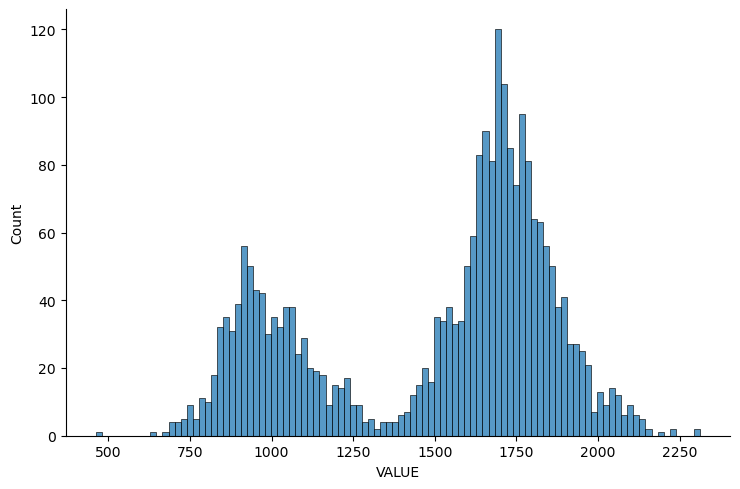

Histgram for training dataset by gender


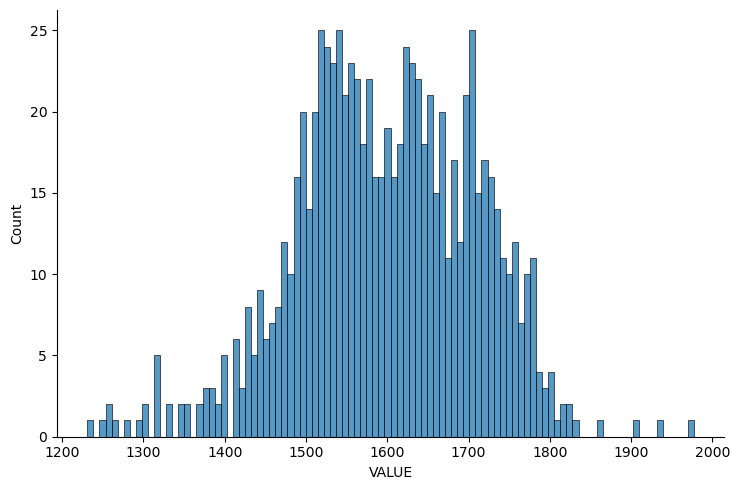

Histgram for training dataset by education


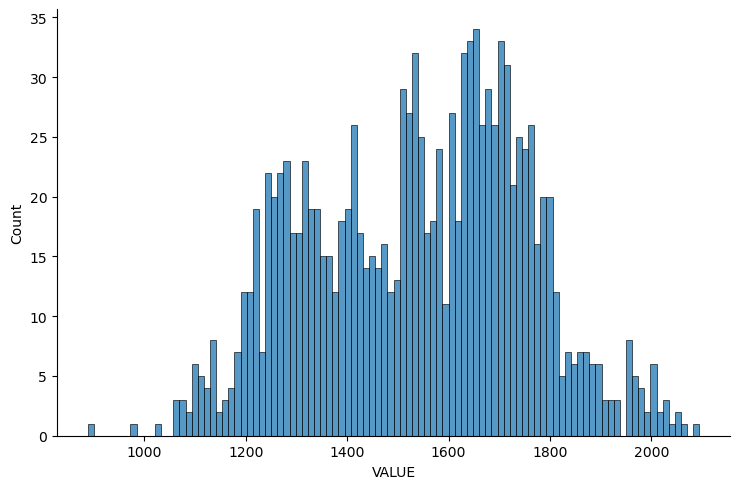

Histgram for training dataset by immigrant


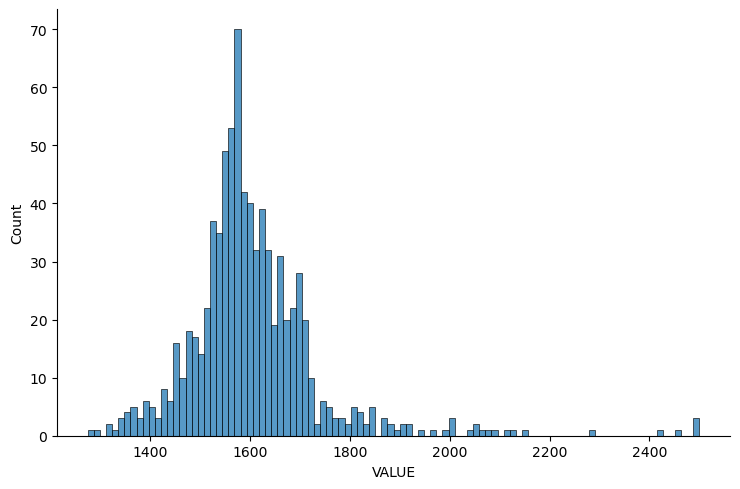

In [43]:
print("Histogram for training dataset by age")
dfa_Target_To_Analysis.print_histogram(0)

print("Histgram for training dataset by gender")
dfa_Target_To_Analysis.print_histogram(1)

print("Histgram for training dataset by education")
dfa_Target_To_Analysis.print_histogram(2)

print("Histgram for training dataset by immigrant")
dfa_Target_To_Analysis.print_histogram(3)

In [44]:
dfa_Target_To_Analysis = [testing_df_AvgAnnHrsWrk_ByAge, testing_df_AvgAnnHrsWrk_ByGender, testing_df_AvgAnnHrsWrk_ByEducation, testing_df_AvgAnnHrsWrk_ByImmigrant]
dfa_Target_To_Analysis = Target_To_Analysis(dfa_Target_To_Analysis, pd, np, pp, sns, ['testing set By Age',
                                                                                      'testing set By Gender',
                                                                                      'testing set By Education',
                                                                                      'testing set By Immigrant'])
dfa_Target_To_Analysis.print_result()

testing set By Age
                            sum         mean    amin  median    amax  size
Characteristics                                                           
15 to 24 years         179872.0   936.833333   713.0   927.5  1281.0   192
25 to 34 years         333662.0  1588.866667  1292.0  1576.0  1870.0   210
35 to 44 years         371386.0  1768.504762  1424.0  1757.0  2092.0   210
45 to 54 years         384987.0  1833.271429  1541.0  1826.5  2191.0   210
55 to 64 years         351843.0  1675.442857  1377.0  1675.0  2071.0   210
65 years old and over  206760.0  1076.875000   565.0  1076.5  1415.0   192
Overall,
Sum :  1828510.0
Mean :  1493.8807189542483
Min/median/max : 565.0 / 1633.0 / 2191.0
Standard Deviation :  357.1076307712267
Skewnewss :  -0.5829393561867995
Total size :  1224

testing set By Gender
                       sum         mean    amin  median    amax  size
Characteristics                                                      
Female employees  323755.0  1541

Histogram for testing dataset by age


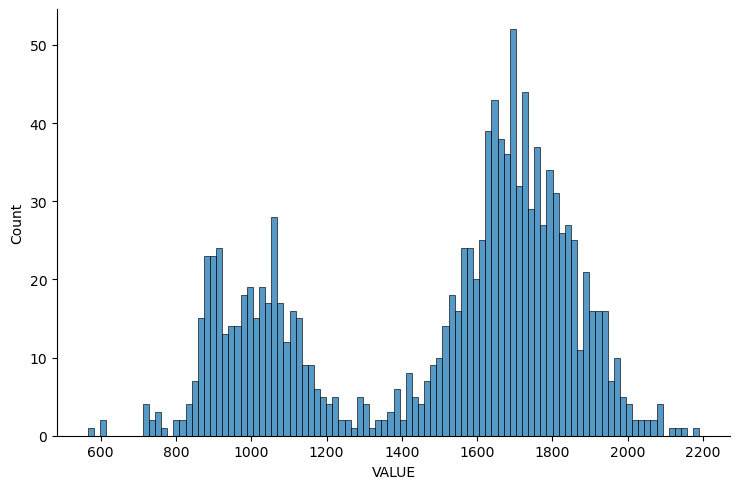

Histgram for testing dataset by gender


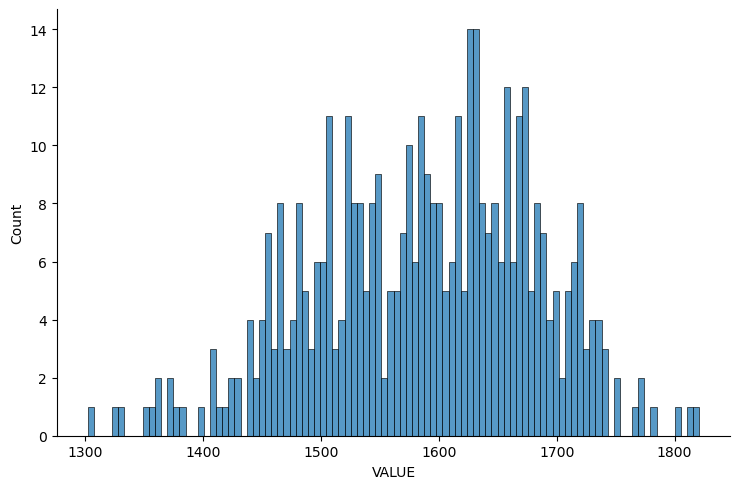

Histgram for testing dataset by education


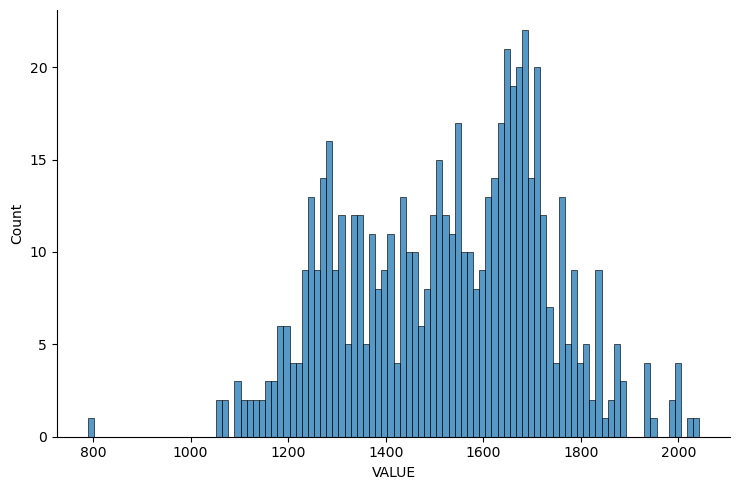

Histgram for testing dataset by immigrant


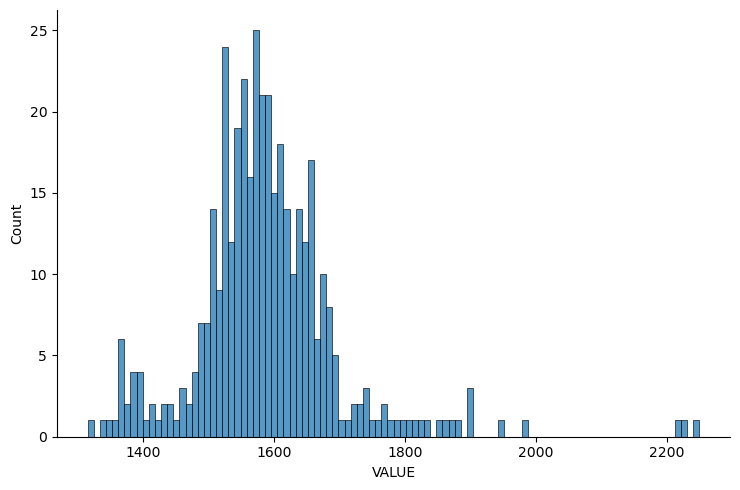

In [45]:
print("Histogram for testing dataset by age")
dfa_Target_To_Analysis.print_histogram(0)

print("Histgram for testing dataset by gender")
dfa_Target_To_Analysis.print_histogram(1)

print("Histgram for testing dataset by education")
dfa_Target_To_Analysis.print_histogram(2)

print("Histgram for testing dataset by immigrant")
dfa_Target_To_Analysis.print_histogram(3)

Final Output for "Average annual wages and salaries"<br />
First being Training dataset and second being Testing dataset.

In [46]:
dfa_Target_To_Analysis = [training_df_AvgAnnWages_ByAge, training_df_AvgAnnWages_ByGender,training_df_AvgAnnWages_ByEducation, training_df_AvgAnnWages_ByImmigrant]
dfa_Target_To_Analysis = Target_To_Analysis(dfa_Target_To_Analysis, pd, np, pp, sns, ['training set By Age',
                                                                                      'training set By Gender',
                                                                                      'training set By Education',
                                                                                      'training set By Immigrant'])
dfa_Target_To_Analysis.print_result()

training set By Age
                              sum          mean     amin   median      amax  \
Characteristics                                                               
15 to 24 years          5844745.0  15220.690104   8769.0  14305.5   39963.0   
25 to 34 years         16279492.0  38760.695238  23433.0  37717.0   69687.0   
35 to 44 years         22063695.0  52532.607143  33680.0  51506.0   92783.0   
45 to 54 years         23873488.0  56841.638095  30761.0  55972.0   94580.0   
55 to 64 years         22698208.0  54043.352381  28716.0  51361.5  113680.0   
65 years old and over  12199299.0  31769.007812  14168.0  29624.0   81488.0   

                       size  
Characteristics              
15 to 24 years          384  
25 to 34 years          420  
35 to 44 years          420  
45 to 54 years          420  
55 to 64 years          420  
65 years old and over   384  
Overall,
Sum :  102958927.0
Mean :  42058.3852124183
Min/median/max : 8769.0 / 41458.0 / 113680.0
Standard 

Histogram for training dataset by age


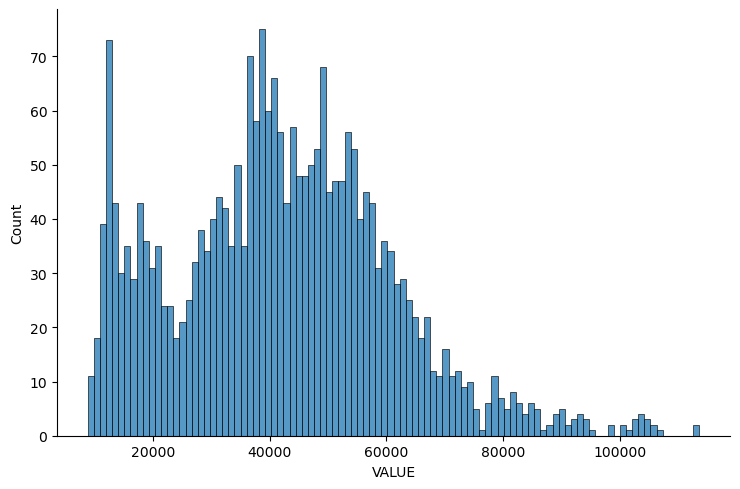

Histgram for training dataset by gender


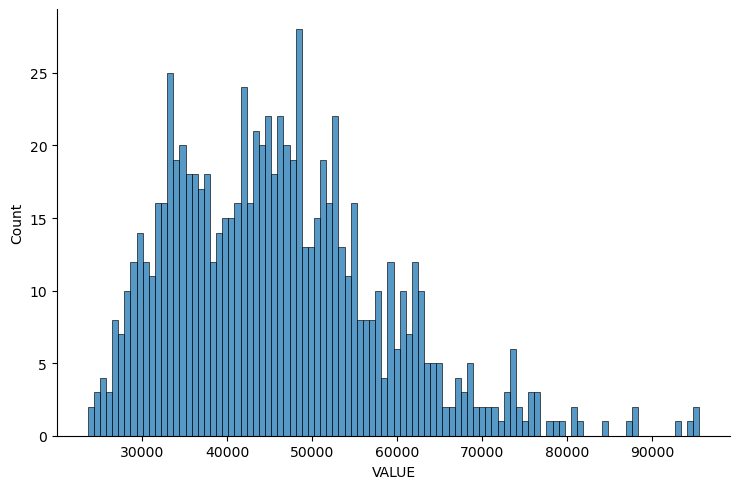

Histgram for training dataset by education


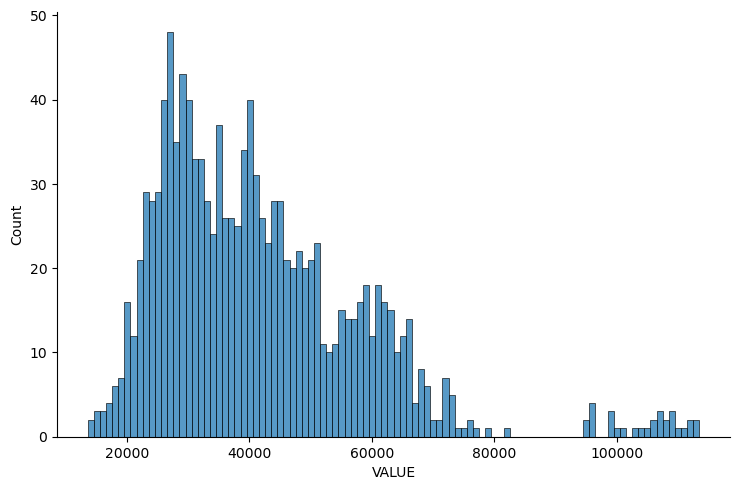

Histgram for training dataset by immigrant


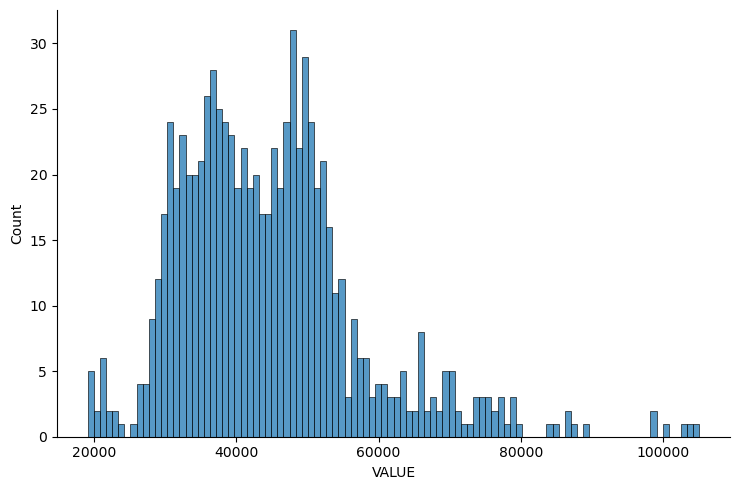

In [47]:
print("Histogram for training dataset by age")
dfa_Target_To_Analysis.print_histogram(0)

print("Histgram for training dataset by gender")
dfa_Target_To_Analysis.print_histogram(1)

print("Histgram for training dataset by education")
dfa_Target_To_Analysis.print_histogram(2)

print("Histgram for training dataset by immigrant")
dfa_Target_To_Analysis.print_histogram(3)

In [48]:
dfa_Target_To_Analysis = [testing_df_AvgAnnWages_ByAge, testing_df_AvgAnnWages_ByGender, testing_df_AvgAnnWages_ByEducation, testing_df_AvgAnnWages_ByImmigrant]
dfa_Target_To_Analysis = Target_To_Analysis(dfa_Target_To_Analysis, pd, np, pp, sns, ['testing set By Age',
                                                                                      'testing set By Gender',
                                                                                      'testing set By Education',
                                                                                      'testing set By Immigrant'])
dfa_Target_To_Analysis.print_result()

testing set By Age
                              sum          mean     amin   median      amax  \
Characteristics                                                               
15 to 24 years          3482308.0  18137.020833  11093.0  16653.5   45844.0   
25 to 34 years          9108041.0  43371.623810  26534.0  42901.0   75429.0   
35 to 44 years         12296655.0  58555.500000  37336.0  56960.5   95714.0   
45 to 54 years         13595377.0  64739.890476  39455.0  64274.5  103580.0   
55 to 64 years         12592232.0  59963.009524  33296.0  56266.0  133071.0   
65 years old and over   6840988.0  35630.145833  18187.0  34170.0   76577.0   

                       size  
Characteristics              
15 to 24 years          192  
25 to 34 years          210  
35 to 44 years          210  
45 to 54 years          210  
55 to 64 years          210  
65 years old and over   192  
Overall,
Sum :  57915601.0
Mean :  47316.66748366013
Min/median/max : 11093.0 / 47033.5 / 133071.0
Standard 

Histogram for testing dataset by age


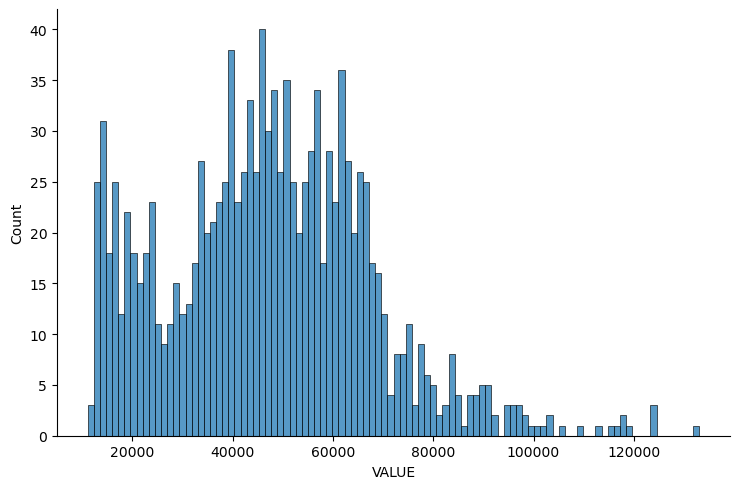

Histgram for testing dataset by gender


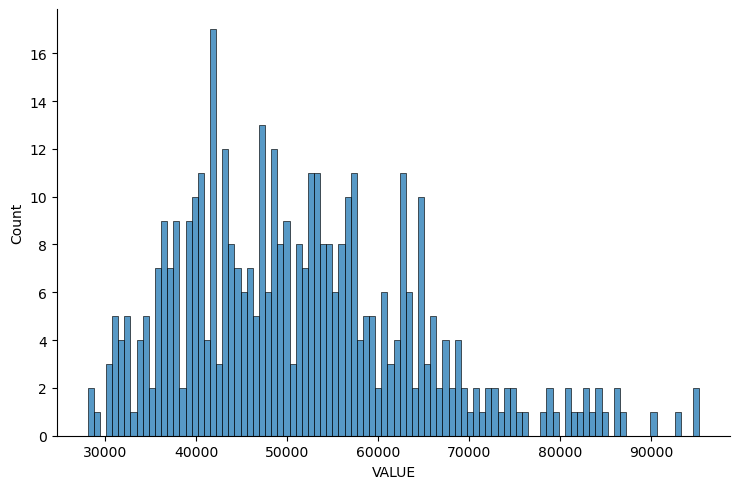

Histgram for testing dataset by education


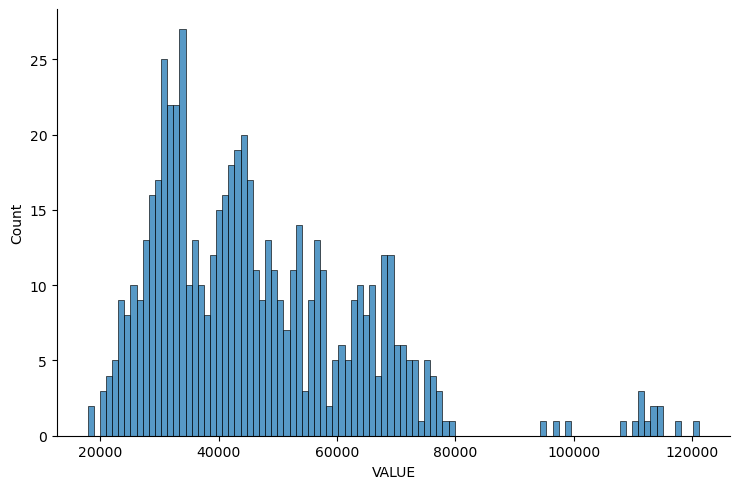

Histgram for testing dataset by immigrant


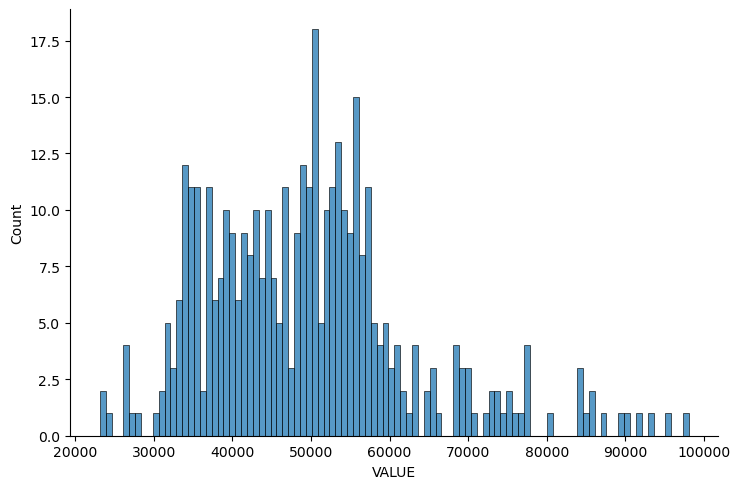

In [49]:
print("Histogram for testing dataset by age")
dfa_Target_To_Analysis.print_histogram(0)

print("Histgram for testing dataset by gender")
dfa_Target_To_Analysis.print_histogram(1)

print("Histgram for testing dataset by education")
dfa_Target_To_Analysis.print_histogram(2)

print("Histgram for testing dataset by immigrant")
dfa_Target_To_Analysis.print_histogram(3)

Final Output for "Average hourly wage"<br />
First being Training dataset and second being Testing dataset.

In [50]:
dfa_Target_To_Analysis = [training_df_AvgHrsWages_ByAge, training_df_AvgHrsWages_ByGender,training_df_AvgHrsWages_ByEducation, training_df_AvgHrsWages_ByImmigrant]
dfa_Target_To_Analysis = Target_To_Analysis(dfa_Target_To_Analysis, pd, np, pp, sns, ['training set By Age',
                                                                                      'training set By Gender',
                                                                                      'training set By Education',
                                                                                      'training set By Immigrant'])
dfa_Target_To_Analysis.print_result()

training set By Age
                            sum       mean   amin  median   amax  size
Characteristics                                                       
15 to 24 years          6394.37  16.652005  11.70  15.830  33.72   384
25 to 34 years         10151.74  24.170810  15.07  23.265  47.75   420
35 to 44 years         12429.33  29.593643  17.22  29.065  54.92   420
45 to 54 years         13001.51  30.955976  16.89  30.625  56.39   420
55 to 64 years         13540.12  32.238381  16.73  30.490  63.53   420
65 years old and over  11253.83  29.306849  15.90  27.780  69.41   384
Overall,
Sum :  66770.9
Mean :  27.275694444444444
Min/median/max : 11.7 / 26.57 / 69.41
Standard Deviation :  9.049315261791325
Skewnewss :  0.9740700424146075
Total size :  2448

training set By Gender
                       sum       mean   amin  median   amax  size
Characteristics                                                  
Female employees  11253.54  26.794143  15.83  25.925  50.72   420
Male emplo

Histogram for training dataset by age


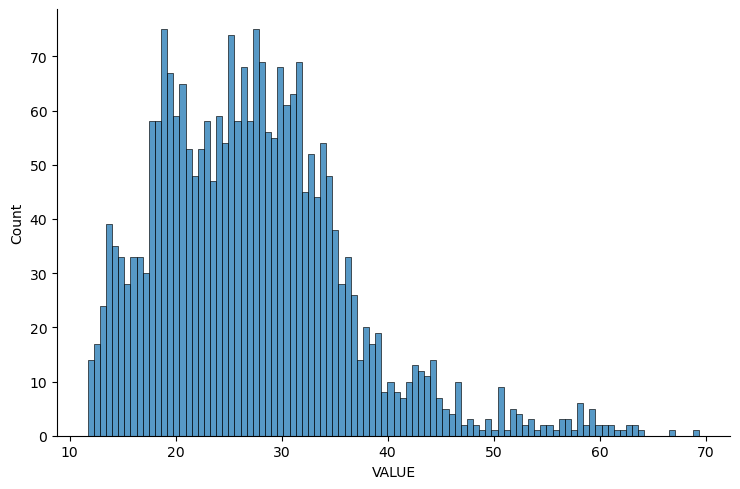

Histgram for training dataset by gender


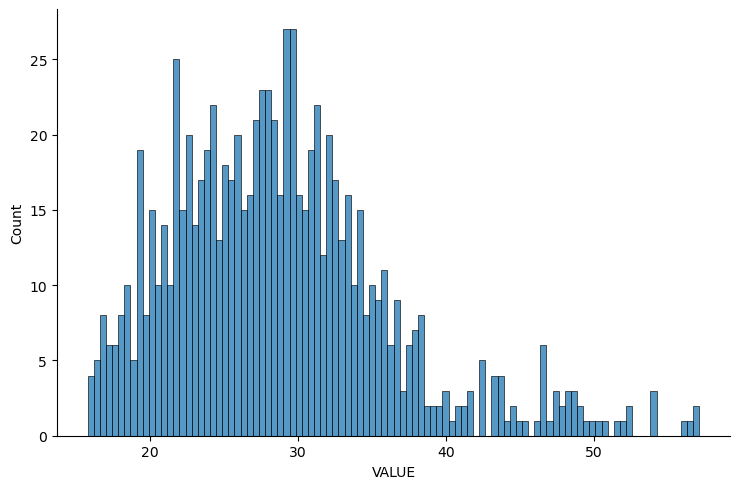

Histgram for training dataset by education


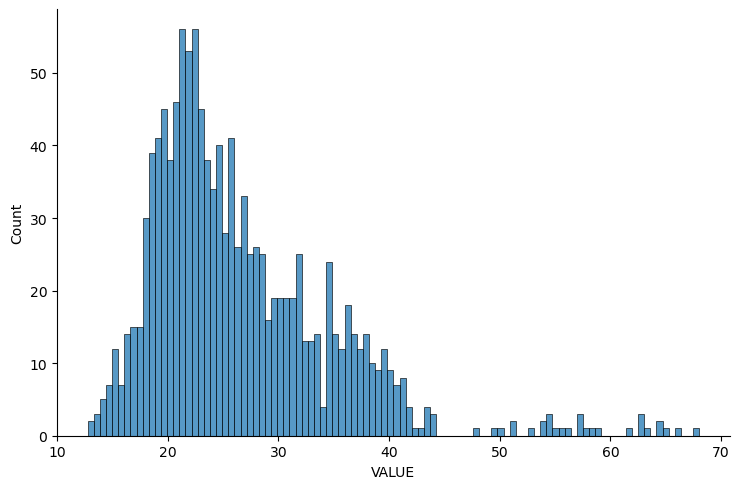

Histgram for training dataset by immigrant


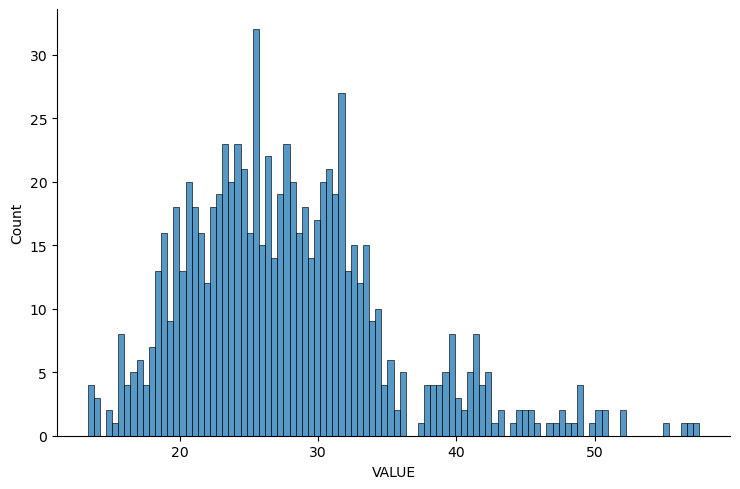

In [51]:
print("Histogram for training dataset by age")
dfa_Target_To_Analysis.print_histogram(0)

print("Histgram for training dataset by gender")
dfa_Target_To_Analysis.print_histogram(1)

print("Histgram for training dataset by education")
dfa_Target_To_Analysis.print_histogram(2)

print("Histgram for training dataset by immigrant")
dfa_Target_To_Analysis.print_histogram(3)

In [52]:
dfa_Target_To_Analysis = [testing_df_AvgHrsWages_ByAge, testing_df_AvgHrsWages_ByGender, testing_df_AvgHrsWages_ByEducation, testing_df_AvgHrsWages_ByImmigrant]
dfa_Target_To_Analysis = Target_To_Analysis(dfa_Target_To_Analysis, pd, np, pp, sns, ['testing set By Age',
                                                                                      'testing set By Gender',
                                                                                      'testing set By Education',
                                                                                      'testing set By Immigrant'])
dfa_Target_To_Analysis.print_result()

testing set By Age
                           sum       mean   amin  median   amax  size
Characteristics                                                      
15 to 24 years         3689.12  19.214167  12.95  18.775  36.37   192
25 to 34 years         5759.41  27.425762  17.01  27.010  45.91   210
35 to 44 years         6991.24  33.291619  19.42  32.680  58.12   210
45 to 54 years         7451.95  35.485476  21.54  34.965  64.54   210
55 to 64 years         7475.92  35.599619  19.42  33.800  64.92   210
65 years old and over  6329.58  32.966563  18.32  32.140  66.63   192
Overall,
Sum :  37697.22
Mean :  30.79838235294118
Min/median/max : 12.95 / 30.425 / 66.63
Standard Deviation :  9.683878549205739
Skewnewss :  0.8175005207452904
Total size :  1224

testing set By Gender
                      sum       mean   amin  median   amax  size
Characteristics                                                 
Female employees  6439.32  30.663429  18.34  30.200  55.06   210
Male employees    720

Histogram for testing dataset by age


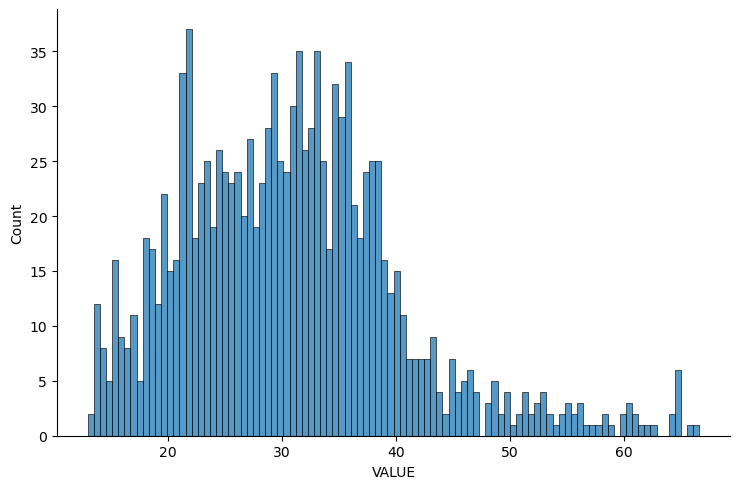

Histgram for testing dataset by gender


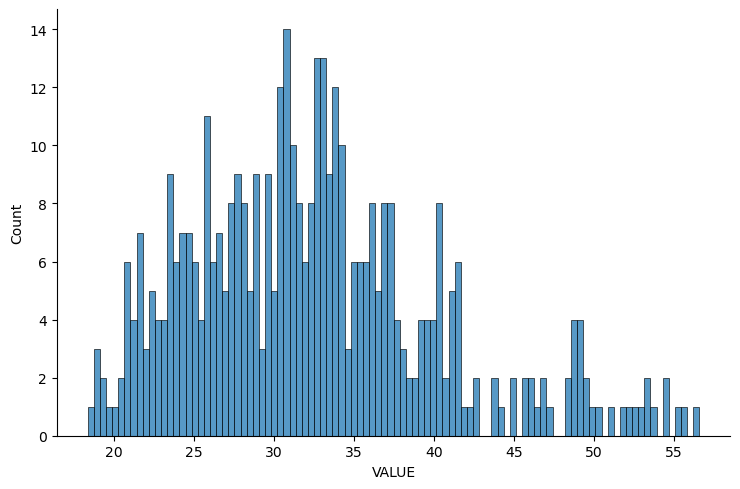

Histgram for testing dataset by education


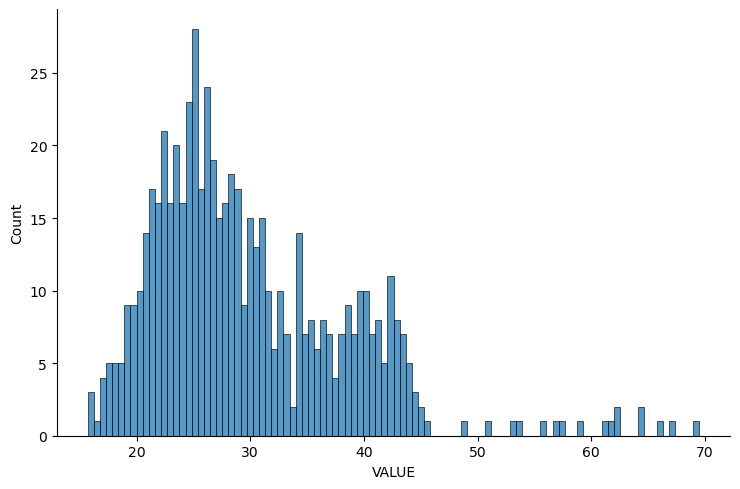

Histgram for testing dataset by immigrant


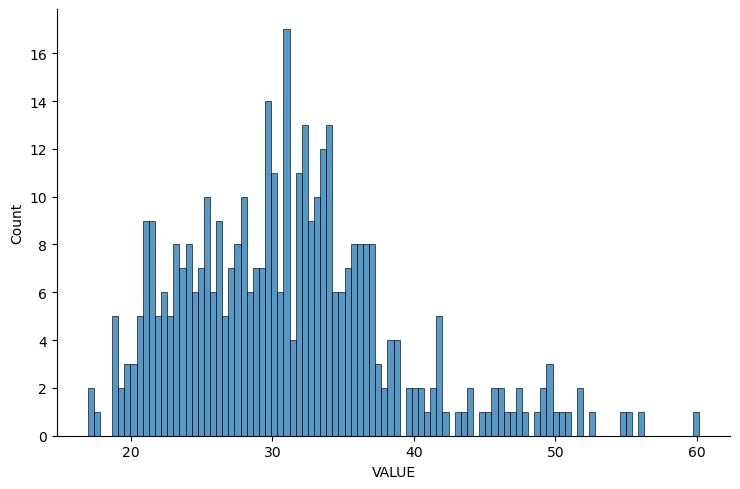

In [53]:
print("Histogram for testing dataset by age")
dfa_Target_To_Analysis.print_histogram(0)

print("Histgram for testing dataset by gender")
dfa_Target_To_Analysis.print_histogram(1)

print("Histgram for testing dataset by education")
dfa_Target_To_Analysis.print_histogram(2)

print("Histgram for testing dataset by immigrant")
dfa_Target_To_Analysis.print_histogram(3)

Final Output for "Average weekly hours worked"<br />
First being Training dataset and second being Testing dataset.

In [54]:
dfa_Target_To_Analysis = [training_df_AvgWeekHrsWrked_ByAge, training_df_Hrs_Wrked_ByGender,training_df_Hrs_Wrked_ByEducation, training_df_Hrs_Wrked_ByImmigrant]
dfa_Target_To_Analysis = Target_To_Analysis(dfa_Target_To_Analysis, pd, np, pp, sns, ['training set By Age',
                                                                                      'training set By Gender',
                                                                                      'training set By Education',
                                                                                      'training set By Immigrant'])
dfa_Target_To_Analysis.print_result()

training set By Age
                           sum       mean  amin  median  amax  size
Characteristics                                                    
15 to 24 years          6701.0  17.450521   9.0    18.0  23.0   384
25 to 34 years         13045.0  31.059524  24.0    31.0  38.0   420
35 to 44 years         14441.0  34.383333  28.0    34.0  42.0   420
45 to 54 years         14869.0  35.402381  29.0    35.0  44.0   420
55 to 64 years         13528.0  32.209524  27.0    32.0  38.0   420
65 years old and over   7948.0  20.697917  13.0    21.0  29.0   384
Overall,
Sum :  70532.0
Mean :  28.812091503267975
Min/median/max : 9.0 / 32.0 / 44.0
Standard Deviation :  7.142617025891534
Skewnewss :  -0.5867338647982026
Total size :  2448

training set By Gender
                         sum           mean  amin   median       amax  size
Characteristics                                                            
Female employees  69941334.0  166526.985714  57.0  27674.0  2635646.0   420
Male e

Histogram for training dataset by age


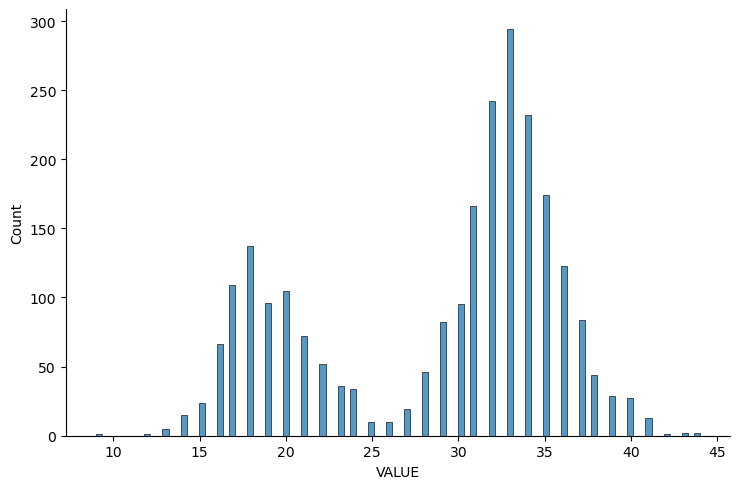

Histgram for training dataset by gender


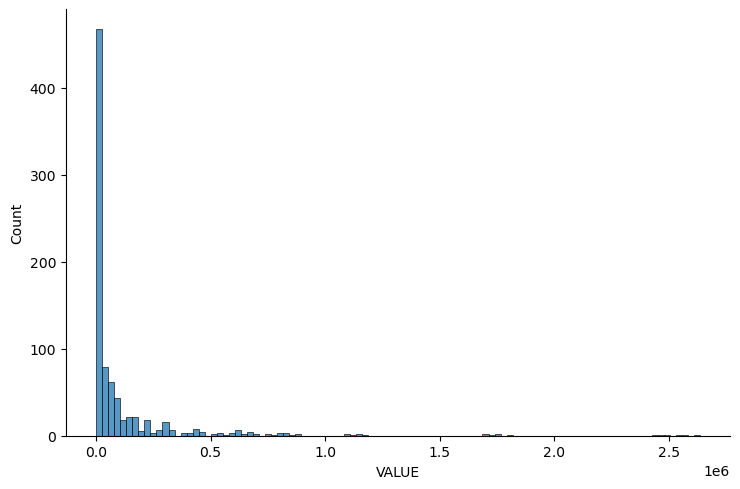

Histgram for training dataset by education


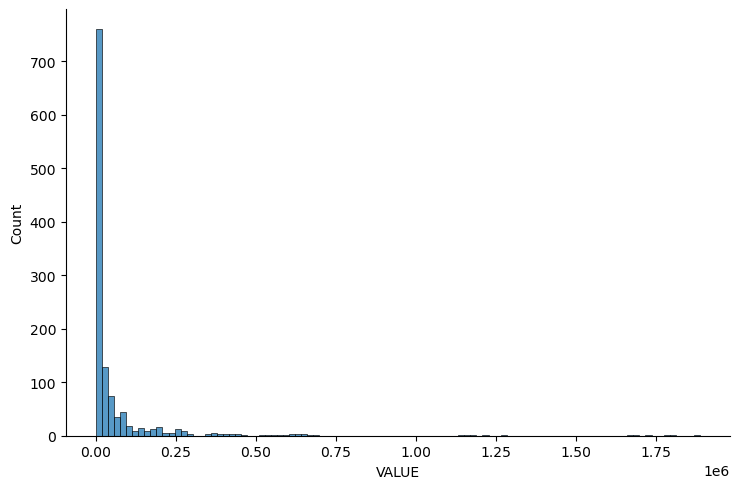

Histgram for training dataset by immigrant


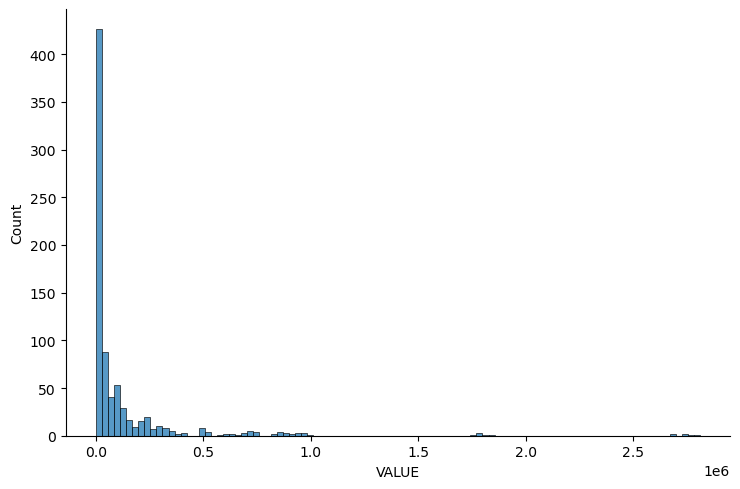

In [55]:
print("Histogram for training dataset by age")
dfa_Target_To_Analysis.print_histogram(0)

print("Histgram for training dataset by gender")
dfa_Target_To_Analysis.print_histogram(1)

print("Histgram for training dataset by education")
dfa_Target_To_Analysis.print_histogram(2)

print("Histgram for training dataset by immigrant")
dfa_Target_To_Analysis.print_histogram(3)

In [56]:
dfa_Target_To_Analysis = [testing_df_AvgWeekHrsWrked_ByAge, testing_df_AvgWeekHrsWrked_ByGender, testing_df_AvgWeekHrsWrked_ByEducation, testing_df_AvgWeekHrsWrked_ByImmigrant]
dfa_Target_To_Analysis = Target_To_Analysis(dfa_Target_To_Analysis, pd, np, pp, sns, ['testing set By Age',
                                                                                      'testing set By Gender',
                                                                                      'testing set By Education',
                                                                                      'testing set By Immigrant'])
dfa_Target_To_Analysis.print_result()

testing set By Age
                          sum       mean  amin  median  amax  size
Characteristics                                                   
15 to 24 years         3465.0  18.046875  14.0    18.0  25.0   192
25 to 34 years         6413.0  30.538095  25.0    30.0  36.0   210
35 to 44 years         7139.0  33.995238  27.0    34.0  40.0   210
45 to 54 years         7406.0  35.266667  30.0    35.0  42.0   210
55 to 64 years         6765.0  32.214286  26.0    32.0  40.0   210
65 years old and over  3969.0  20.671875  11.0    21.0  27.0   192
Overall,
Sum :  35157.0
Mean :  28.723039215686274
Min/median/max : 11.0 / 31.0 / 42.0
Standard Deviation :  6.87095753369461
Skewnewss :  -0.578814861266804
Total size :  1224

testing set By Gender
                     sum       mean  amin  median  amax  size
Characteristics                                              
Female employees  6219.0  29.614286  25.0    30.0  34.0   210
Male employees    6590.0  31.380952  26.0    32.0  35.0   2

Histogram for testing dataset by age


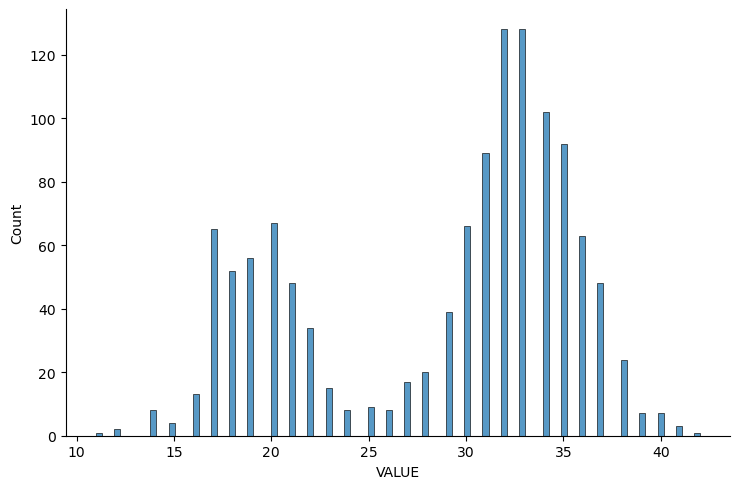

Histgram for testing dataset by gender


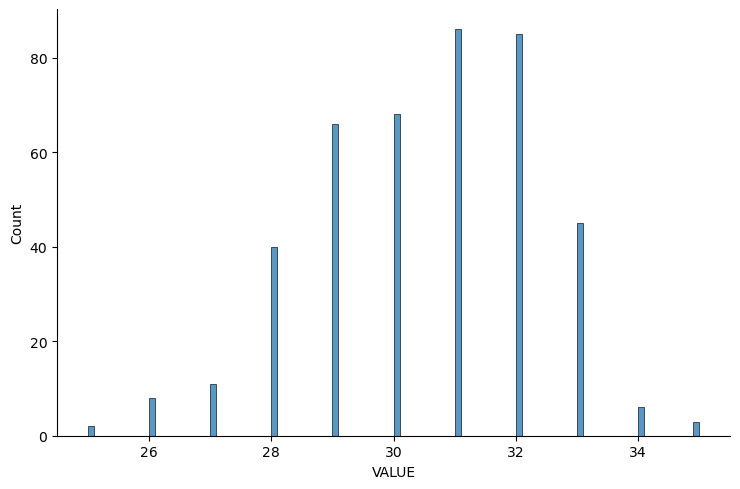

Histgram for testing dataset by education


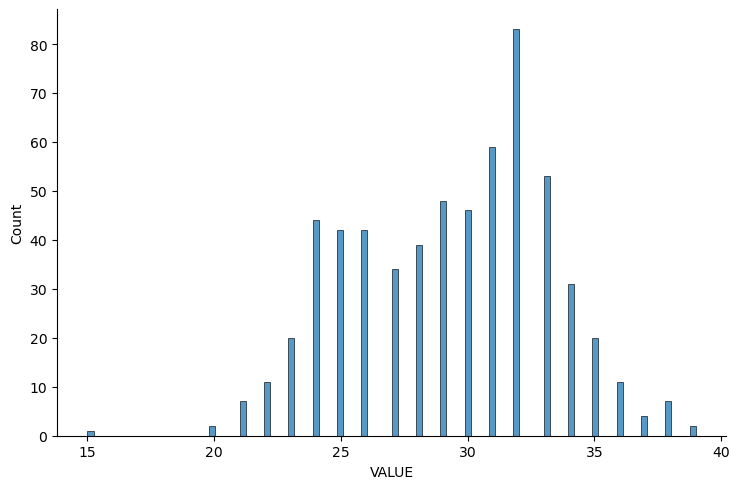

Histgram for testing dataset by immigrant


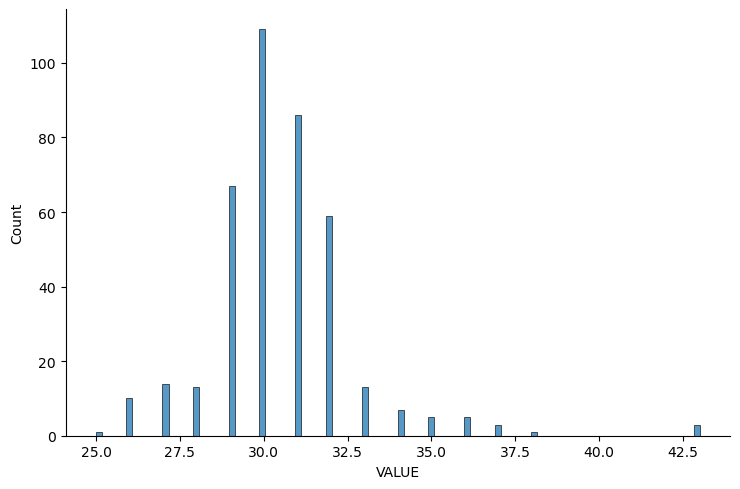

In [57]:
print("Histogram for testing dataset by age")
dfa_Target_To_Analysis.print_histogram(0)

print("Histgram for testing dataset by gender")
dfa_Target_To_Analysis.print_histogram(1)

print("Histgram for testing dataset by education")
dfa_Target_To_Analysis.print_histogram(2)

print("Histgram for testing dataset by immigrant")
dfa_Target_To_Analysis.print_histogram(3)

Final Output for "Hours Worked"<br />
First being Training dataset and second being Testing dataset.

In [58]:
dfa_Target_To_Analysis = [training_df_Hrs_Wrked_ByAge, training_df_Hrs_Wrked_ByGender,training_df_Hrs_Wrked_ByEducation, training_df_Hrs_Wrked_ByImmigrant]
dfa_Target_To_Analysis = Target_To_Analysis(dfa_Target_To_Analysis, pd, np, pp, sns, ['training set By Age',
                                                                                      'training set By Gender',
                                                                                      'training set By Education',
                                                                                      'training set By Immigrant'])
dfa_Target_To_Analysis.print_result()

training set By Age
                              sum          mean  amin   median      amax  size
Characteristics                                                               
15 to 24 years          6319354.0  16456.651042   6.0   4000.0  225988.0   384
25 to 34 years         21892318.0  52124.566667  32.0   9676.5  824205.0   420
35 to 44 years         23526930.0  56016.500000  32.0  10443.5  892149.0   420
45 to 54 years         26229128.0  62450.304762  29.0  10857.5  955066.0   420
55 to 64 years         20321678.0  48384.947619  20.0   8825.5  754767.0   420
65 years old and over   4298529.0  11194.085938  26.0   2495.5  168451.0   384
Overall,
Sum :  102587937.0
Mean :  41906.83700980392
Min/median/max : 6.0 / 6102.0 / 955066.0
Standard Deviation :  108499.46186114324
Skewnewss :  5.117834269815508
Total size :  2448

training set By Gender
                         sum           mean  amin   median       amax  size
Characteristics                                               

Histogram for training dataset by age


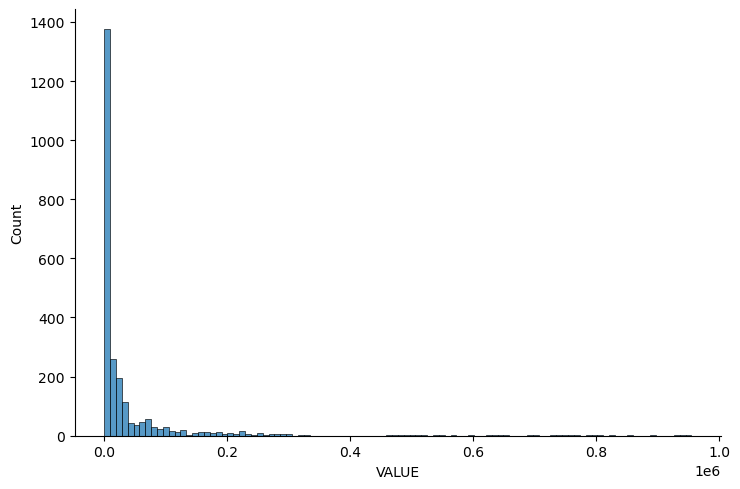

Histgram for training dataset by gender


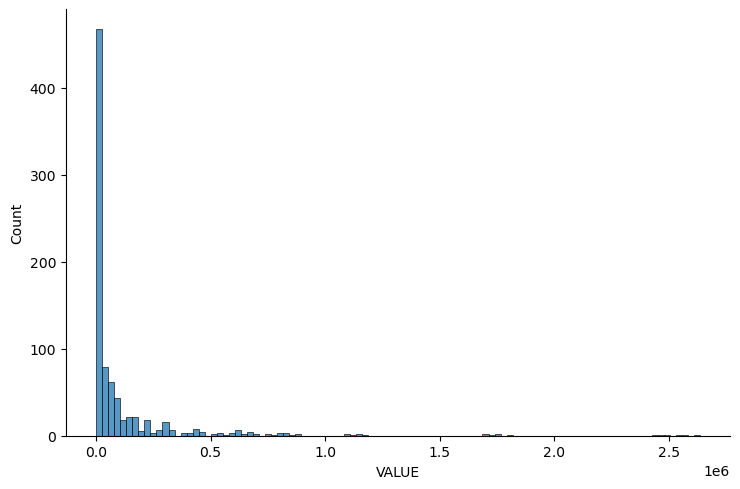

Histgram for training dataset by education


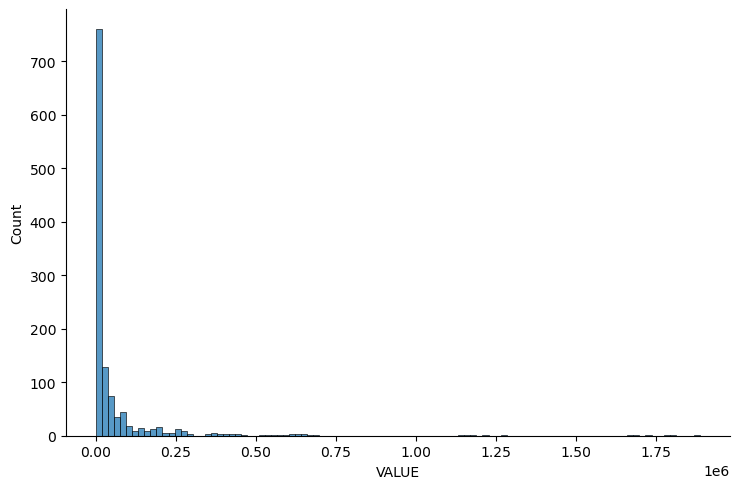

Histgram for training dataset by immigrant


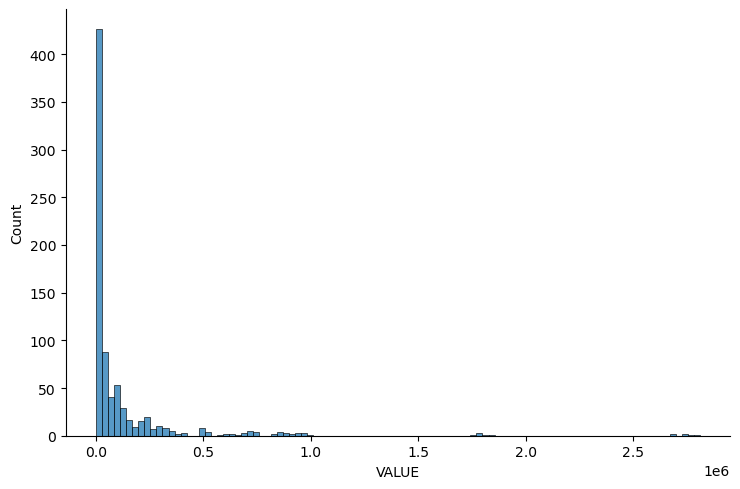

In [59]:
print("Histogram for training dataset by age")
dfa_Target_To_Analysis.print_histogram(0)

print("Histgram for training dataset by gender")
dfa_Target_To_Analysis.print_histogram(1)

print("Histgram for training dataset by education")
dfa_Target_To_Analysis.print_histogram(2)

print("Histgram for training dataset by immigrant")
dfa_Target_To_Analysis.print_histogram(3)

In [60]:
dfa_Target_To_Analysis = [testing_df_Hrs_Wrked_ByAge, testing_df_Hrs_Wrked_ByGender, testing_df_Hrs_Wrked_ByEducation, testing_df_Hrs_Wrked_ByImmigrant]
dfa_Target_To_Analysis = Target_To_Analysis(dfa_Target_To_Analysis, pd, np, pp, sns, ['testing set By Age',
                                                                                      'testing set By Gender',
                                                                                      'testing set By Education',
                                                                                      'testing set By Immigrant'])
dfa_Target_To_Analysis.print_result()

testing set By Age
                              sum          mean  amin   median      amax  size
Characteristics                                                               
15 to 24 years          3132171.0  16313.390625  29.0   3859.5  228566.0   192
25 to 34 years         11857576.0  56464.647619  32.0  10166.5  888764.0   210
35 to 44 years         12919606.0  61521.933333  33.0  10825.0  971688.0   210
45 to 54 years         12974580.0  61783.714286  31.0  10600.5  966480.0   210
55 to 64 years         10690620.0  50907.714286  25.0   8934.0  794712.0   210
65 years old and over   2528517.0  13169.359375  30.0   2913.5  183461.0   192
Overall,
Sum :  54103070.0
Mean :  44201.8545751634
Min/median/max : 25.0 / 6420.5 / 971688.0
Standard Deviation :  114827.01044742283
Skewnewss :  5.111311073923015
Total size :  1224

testing set By Gender
                         sum           mean  amin   median       amax  size
Characteristics                                                  

Histogram for testing dataset by age


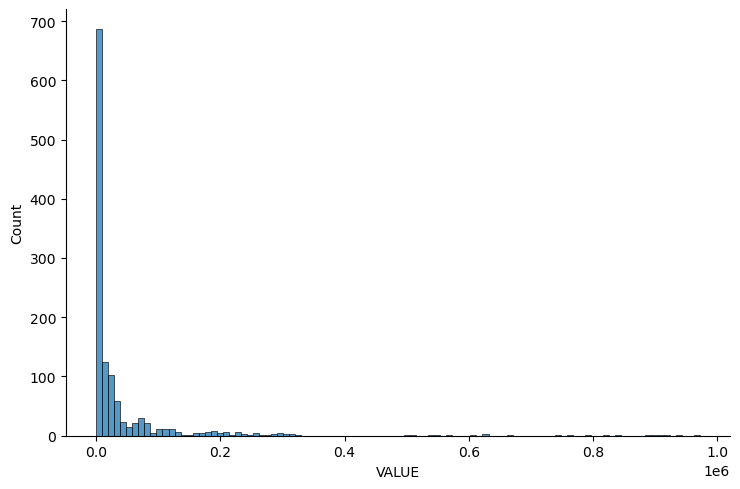

Histgram for testing dataset by gender


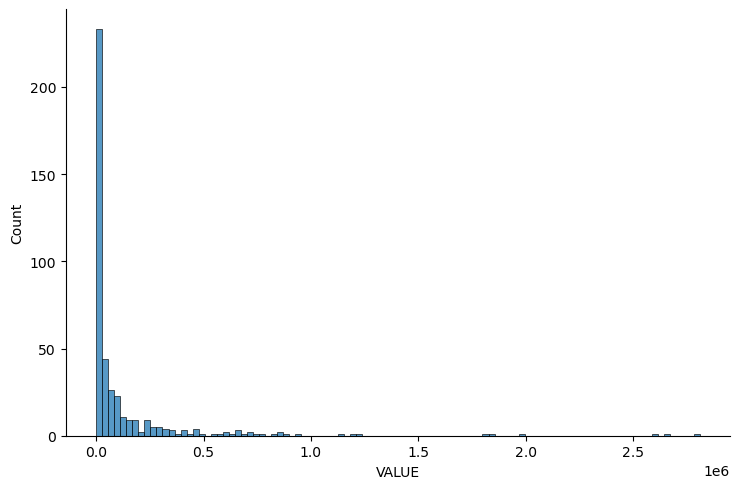

Histgram for testing dataset by education


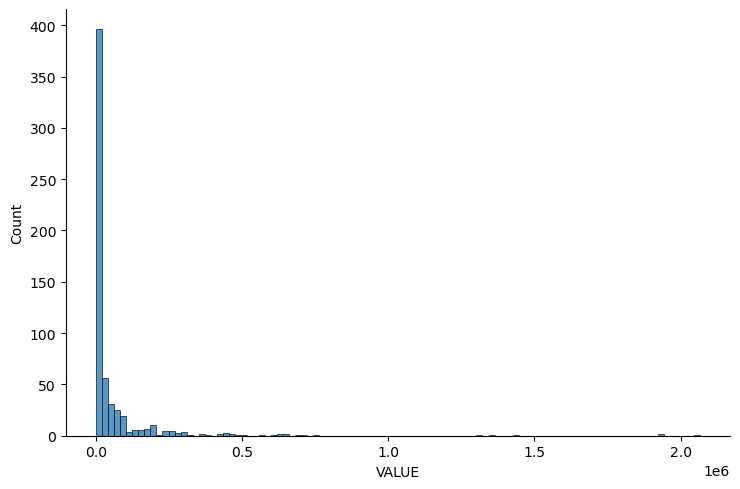

Histgram for testing dataset by immigrant


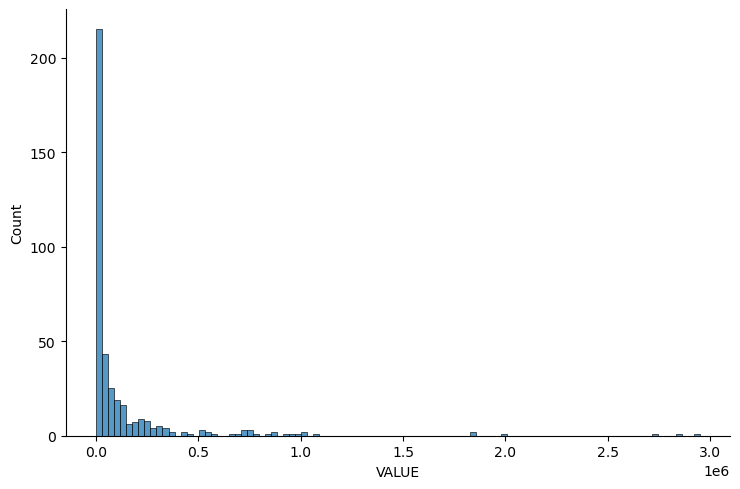

In [61]:
print("Histogram for testing dataset by age")
dfa_Target_To_Analysis.print_histogram(0)

print("Histgram for testing dataset by gender")
dfa_Target_To_Analysis.print_histogram(1)

print("Histgram for testing dataset by education")
dfa_Target_To_Analysis.print_histogram(2)

print("Histgram for testing dataset by immigrant")
dfa_Target_To_Analysis.print_histogram(3)

Final Output for "Number of jobs"<br />
First being Training dataset and second being Testing dataset.

In [62]:
dfa_Target_To_Analysis = [training_df_NumOfJob_ByAge, training_df_NumOfJob_ByGender,training_df_NumOfJob_ByEducation, training_df_NumOfJob_ByImmigrant]
dfa_Target_To_Analysis = Target_To_Analysis(dfa_Target_To_Analysis, pd, np, pp, sns, ['training set By Age',
                                                                                      'training set By Gender',
                                                                                      'training set By Education',
                                                                                      'training set By Immigrant'])
dfa_Target_To_Analysis.print_result()

training set By Age
                              sum          mean  amin  median      amax  size
Characteristics                                                              
15 to 24 years          7043629.0  18342.783854  13.0  4215.0  246749.0   384
25 to 34 years         13985914.0  33299.795238  17.0  5885.0  527094.0   420
35 to 44 years         13654580.0  32510.904762  18.0  5906.0  516879.0   420
45 to 54 years         14554094.0  34652.604762  14.0  5993.0  530812.0   420
55 to 64 years         12313508.0  29317.876190  11.0  5355.0  453209.0   420
65 years old and over   4150652.0  10808.989583  18.0  2306.5  162525.0   384
Overall,
Sum :  65702377.0
Mean :  26839.206290849674
Min/median/max : 11.0 / 4297.5 / 530812.0
Standard Deviation :  65598.85047255474
Skewnewss :  4.799583077489634
Total size :  2448

training set By Gender
                         sum           mean  amin   median       amax  size
Characteristics                                                       

Histogram for training dataset by age


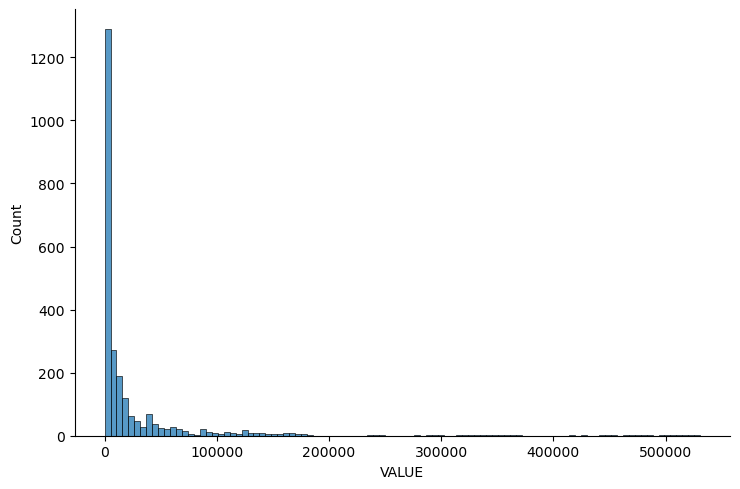

Histgram for training dataset by gender


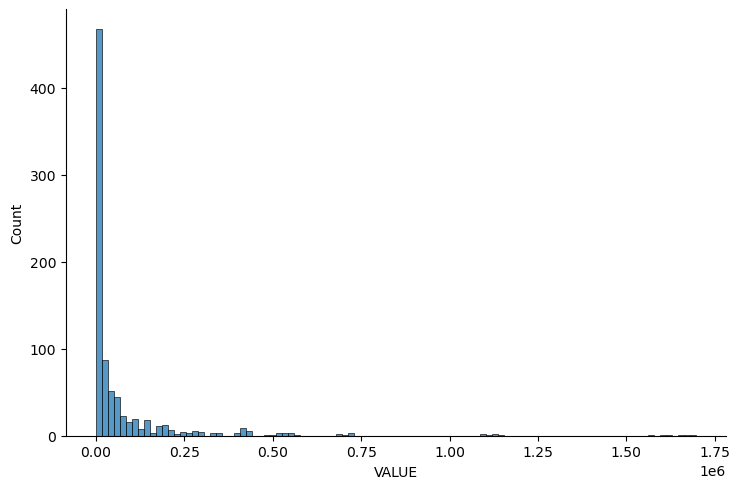

Histgram for training dataset by education


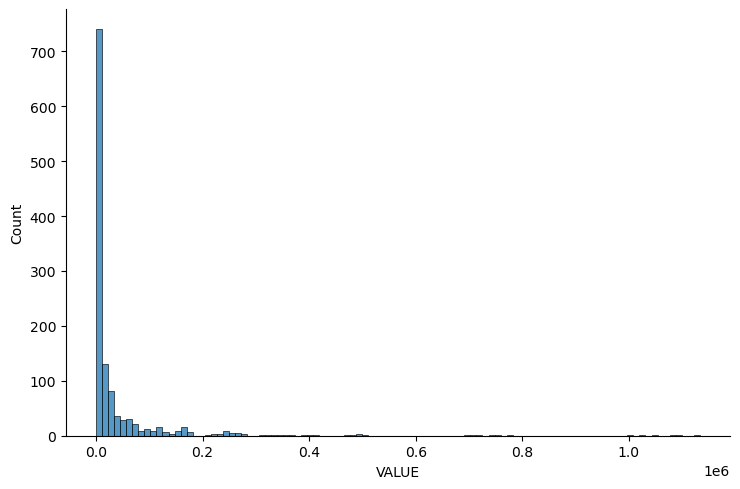

Histgram for training dataset by immigrant


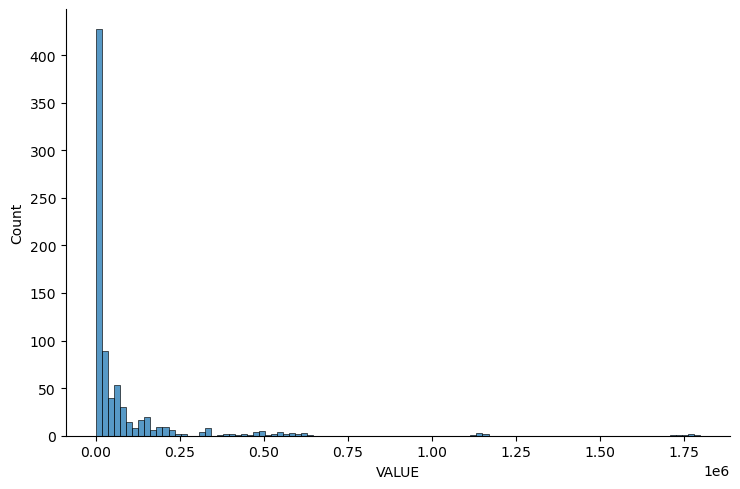

In [63]:
print("Histogram for training dataset by age")
dfa_Target_To_Analysis.print_histogram(0)

print("Histgram for training dataset by gender")
dfa_Target_To_Analysis.print_histogram(1)

print("Histgram for training dataset by education")
dfa_Target_To_Analysis.print_histogram(2)

print("Histgram for training dataset by immigrant")
dfa_Target_To_Analysis.print_histogram(3)

In [64]:
dfa_Target_To_Analysis = [testing_df_NumOfJob_ByAge, testing_df_NumOfJob_ByGender, testing_df_NumOfJob_ByEducation, testing_df_NumOfJob_ByImmigrant]
dfa_Target_To_Analysis = Target_To_Analysis(dfa_Target_To_Analysis, pd, np, pp, sns, ['testing set By Age',
                                                                                      'testing set By Gender',
                                                                                      'testing set By Education',
                                                                                      'testing set By Immigrant'])
dfa_Target_To_Analysis.print_result()

testing set By Age
                             sum          mean  amin  median      amax  size
Characteristics                                                             
15 to 24 years         3414206.0  17782.322917  24.0  4022.0  247960.0   192
25 to 34 years         7615612.0  36264.819048  19.0  6267.5  564788.0   210
35 to 44 years         7559436.0  35997.314286  18.0  6322.0  561685.0   210
45 to 54 years         7201656.0  34293.600000  16.0  5847.0  529125.0   210
55 to 64 years         6451160.0  30719.809524  13.0  5371.5  472689.0   210
65 years old and over  2416851.0  12587.765625  25.0  2729.0  173157.0   192
Overall,
Sum :  34658921.0
Mean :  28316.111928104576
Min/median/max : 13.0 / 4637.5 / 564788.0
Standard Deviation :  69539.28870799903
Skewnewss :  4.838307897340021
Total size :  1224

testing set By Gender
                         sum           mean  amin   median       amax  size
Characteristics                                                            
Fema

Histogram for testing dataset by age


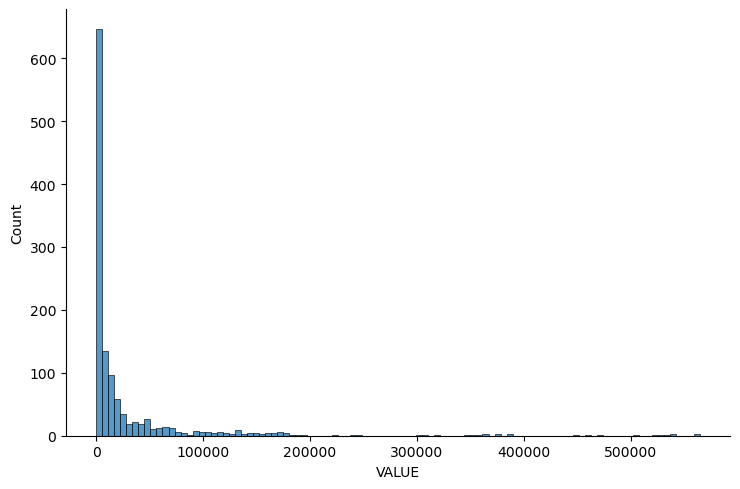

Histgram for testing dataset by gender


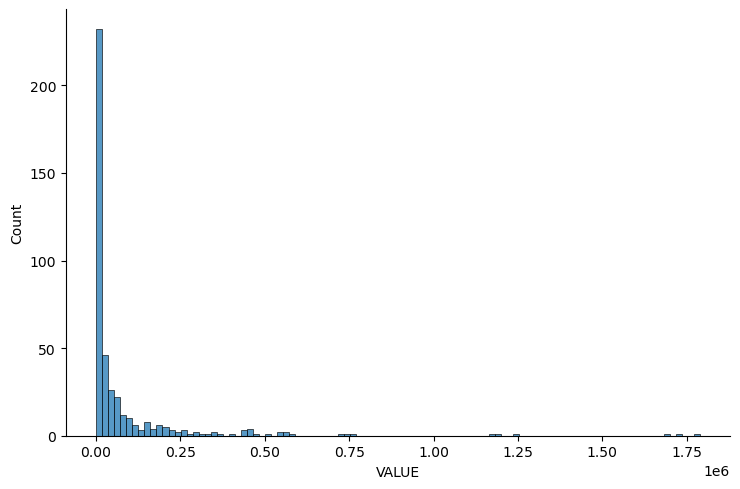

Histgram for testing dataset by education


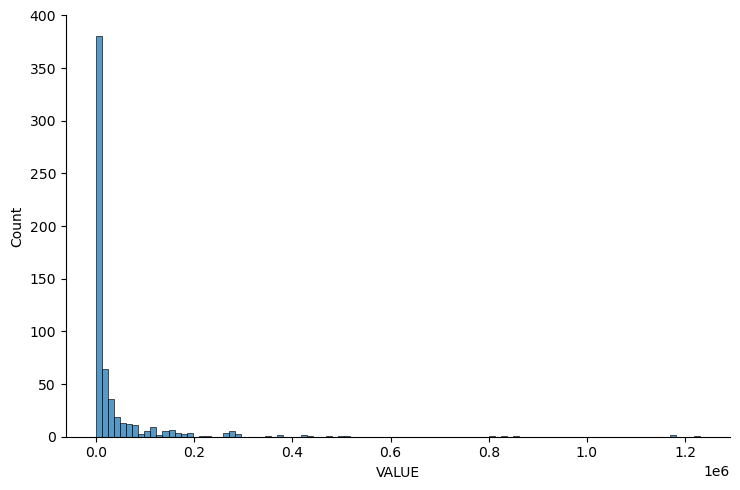

Histgram for testing dataset by immigrant


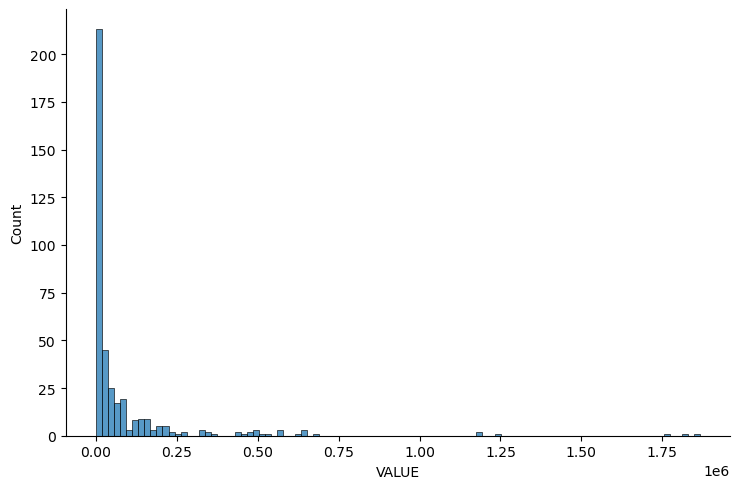

In [65]:
print("Histogram for testing dataset by age")
dfa_Target_To_Analysis.print_histogram(0)

print("Histgram for testing dataset by gender")
dfa_Target_To_Analysis.print_histogram(1)

print("Histgram for testing dataset by education")
dfa_Target_To_Analysis.print_histogram(2)

print("Histgram for testing dataset by immigrant")
dfa_Target_To_Analysis.print_histogram(3)

Final Output for "Wages and Salaries"<br />
First being Training dataset and second being Testing dataset.

In [66]:
dfa_Target_To_Analysis = [training_df_WagesAndSalaries_ByAge, training_df_WagesAndSalaries_ByGender,training_df_WagesAndSalaries_ByEducation, training_df_WagesAndSalaries_ByImmigrant]
dfa_Target_To_Analysis = Target_To_Analysis(dfa_Target_To_Analysis, pd, np, pp, sns, ['training set By Age',
                                                                                      'training set By Gender',
                                                                                      'training set By Education',
                                                                                      'training set By Immigrant'])
dfa_Target_To_Analysis.print_result()

training set By Age
                            sum         mean  amin  median     amax  size
Characteristics                                                          
15 to 24 years         108973.0   283.783854   0.0    63.0   4250.0   384
25 to 34 years         538547.0  1282.254762   1.0   211.0  21911.0   420
35 to 44 years         710804.0  1692.390476   1.0   252.5  28840.0   420
45 to 54 years         842807.0  2006.683333   1.0   285.5  32326.0   420
55 to 64 years         657465.0  1565.392857   1.0   228.0  25923.0   420
65 years old and over  138783.0   361.414062   1.0    66.5   5823.0   384
Overall,
Sum :  2997379.0
Mean :  1224.4195261437908
Min/median/max : 0.0 / 140.0 / 32326.0
Standard Deviation :  3393.654254908312
Skewnewss :  5.409532570280809
Total size :  2448

training set By Gender
                        sum         mean  amin  median     amax  size
Characteristics                                                      
Female employees  1953878.0  4652.090476  

Histogram for training dataset by age


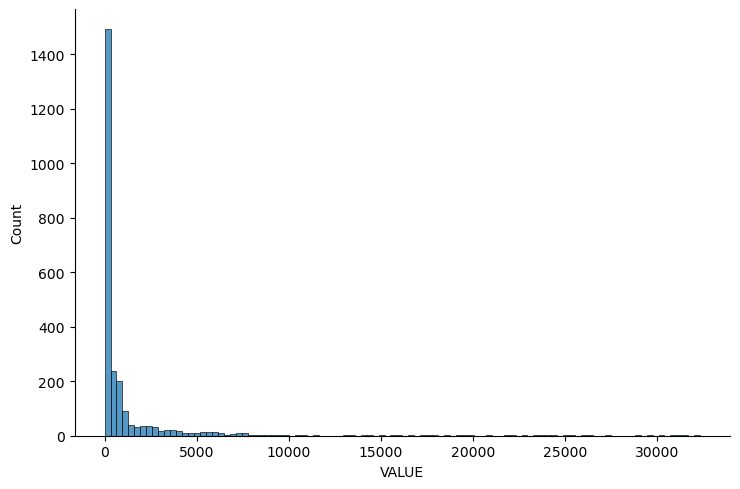

Histgram for training dataset by gender


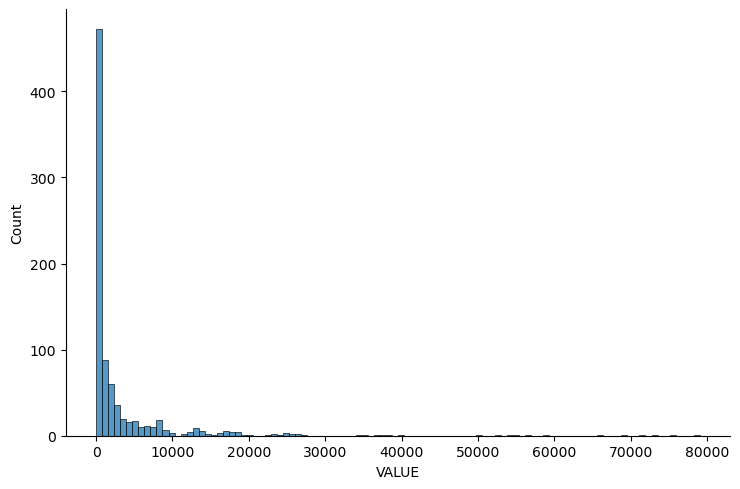

Histgram for training dataset by education


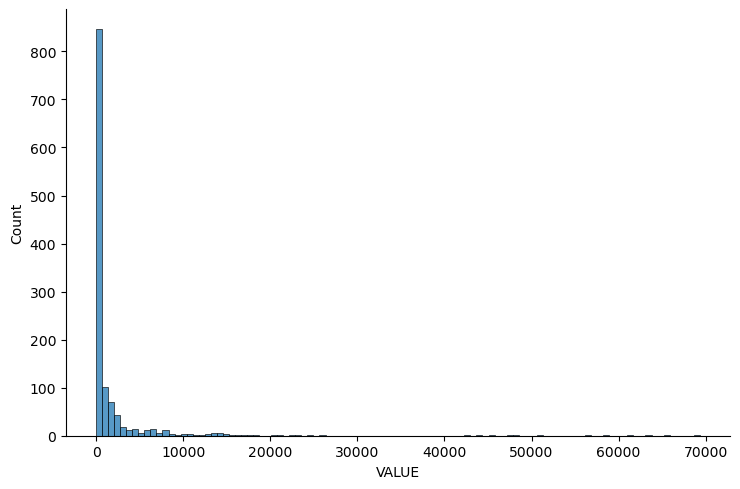

Histgram for training dataset by immigrant


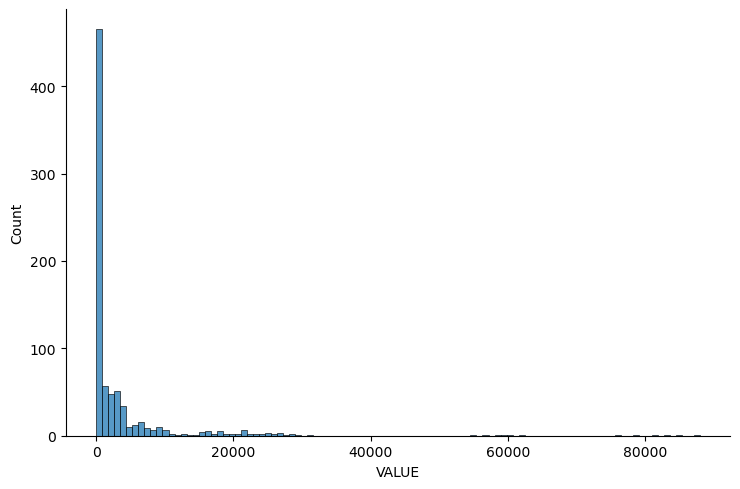

In [67]:
print("Histogram for training dataset by age")
dfa_Target_To_Analysis.print_histogram(0)

print("Histgram for training dataset by gender")
dfa_Target_To_Analysis.print_histogram(1)

print("Histgram for training dataset by education")
dfa_Target_To_Analysis.print_histogram(2)

print("Histgram for training dataset by immigrant")
dfa_Target_To_Analysis.print_histogram(3)

In [68]:
dfa_Target_To_Analysis = [testing_df_WagesAndSalaries_ByAge, testing_df_WagesAndSalaries_ByGender, testing_df_WagesAndSalaries_ByEducation, testing_df_WagesAndSalaries_ByImmigrant]
dfa_Target_To_Analysis = Target_To_Analysis(dfa_Target_To_Analysis, pd, np, pp, sns, ['testing set By Age',
                                                                                      'testing set By Gender',
                                                                                      'testing set By Education',
                                                                                      'testing set By Immigrant'])
dfa_Target_To_Analysis.print_result()

testing set By Age
                            sum         mean  amin  median     amax  size
Characteristics                                                          
15 to 24 years          63069.0   328.484375   1.0    69.0   4797.0   192
25 to 34 years         334200.0  1591.428571   1.0   236.5  25966.0   210
35 to 44 years         441049.0  2100.233333   2.0   314.5  34223.0   210
45 to 54 years         474202.0  2258.104762   1.0   317.0  36376.0   210
55 to 64 years         386319.0  1839.614286   1.0   260.5  29595.0   210
65 years old and over   90513.0   471.421875   1.0    88.0   6876.0   192
Overall,
Sum :  1789352.0
Mean :  1461.888888888889
Min/median/max : 1.0 / 160.5 / 36376.0
Standard Deviation :  4021.2164121982664
Skewnewss :  5.308031050696339
Total size :  1224

testing set By Gender
                        sum         mean  amin  median     amax  size
Characteristics                                                      
Female employees  1179670.0  5617.476190   3

Histogram for testing dataset by age


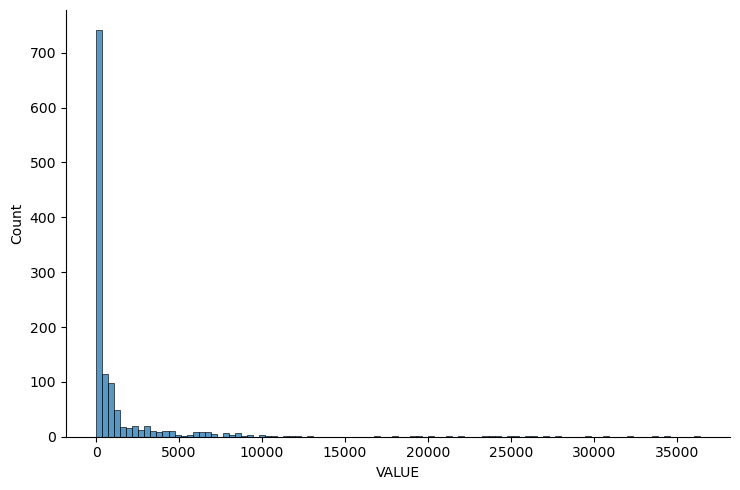

Histgram for testing dataset by gender


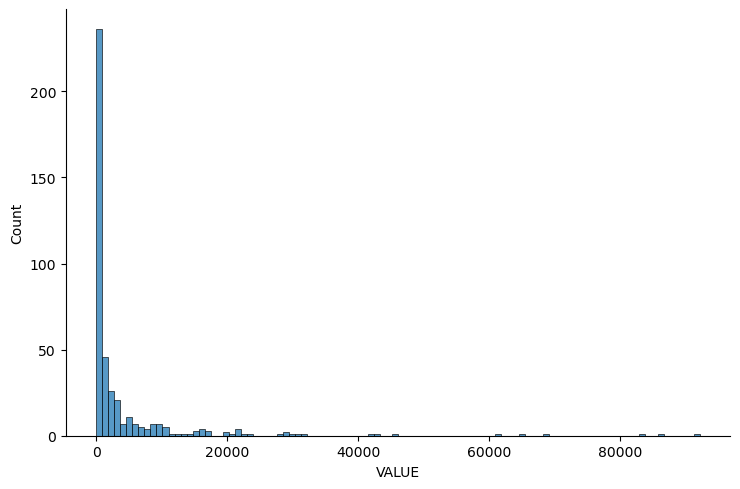

Histgram for testing dataset by education


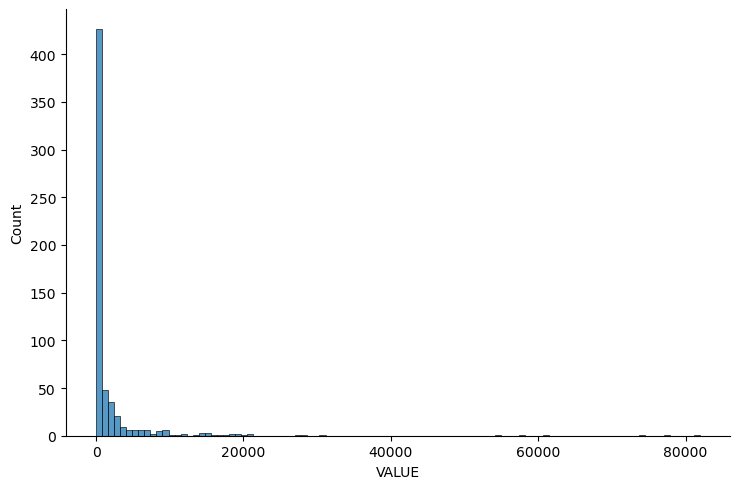

Histgram for testing dataset by immigrant


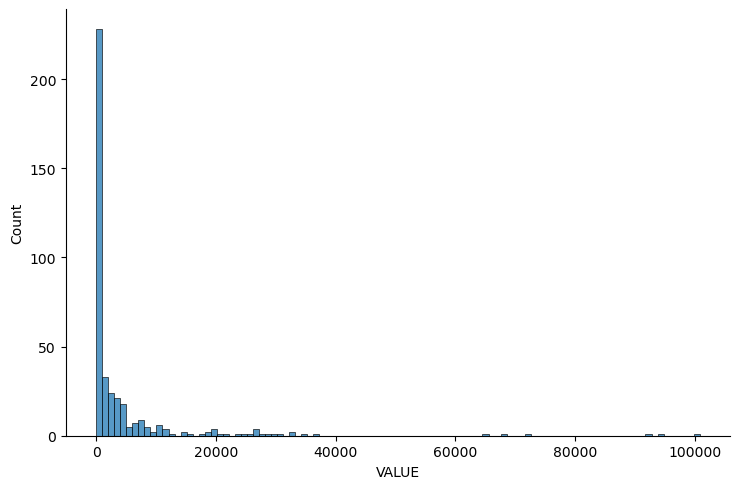

In [69]:
print("Histogram for testing dataset by age")
dfa_Target_To_Analysis.print_histogram(0)

print("Histgram for testing dataset by gender")
dfa_Target_To_Analysis.print_histogram(1)

print("Histgram for testing dataset by education")
dfa_Target_To_Analysis.print_histogram(2)

print("Histgram for testing dataset by immigrant")
dfa_Target_To_Analysis.print_histogram(3)